In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.feature_selection import RFE

In [3]:
def model_train_test(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    conf = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    conf.plot(cmap=plt.cm.Blues, values_format='g')
    plt.show()
    
def gridsearch_train_test(grid_search):
    grid_search = grid_search.fit(X_train_scaled,y_train)
    print(grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred=grid_search.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=grid_search.classes_)
    conf = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_)
    conf.plot(cmap=plt.cm.Blues, values_format='g')
    plt.show()
    
def get_tree_model_feature_rank(model):
    rfe = RFE(model, n_features_to_select=7)
    rfe.fit(X_train_scaled, y_train)
    ranks = rfe.ranking_
    return ranks

* Stroke dataset analysis

In [59]:
#read stroke dataset
df_stroke=pd.read_csv('C:\\Users\ERAY\PycharmProjects\\790project\stroke_data.csv')
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [60]:
df_stroke.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [61]:
df_stroke = df_stroke.dropna()

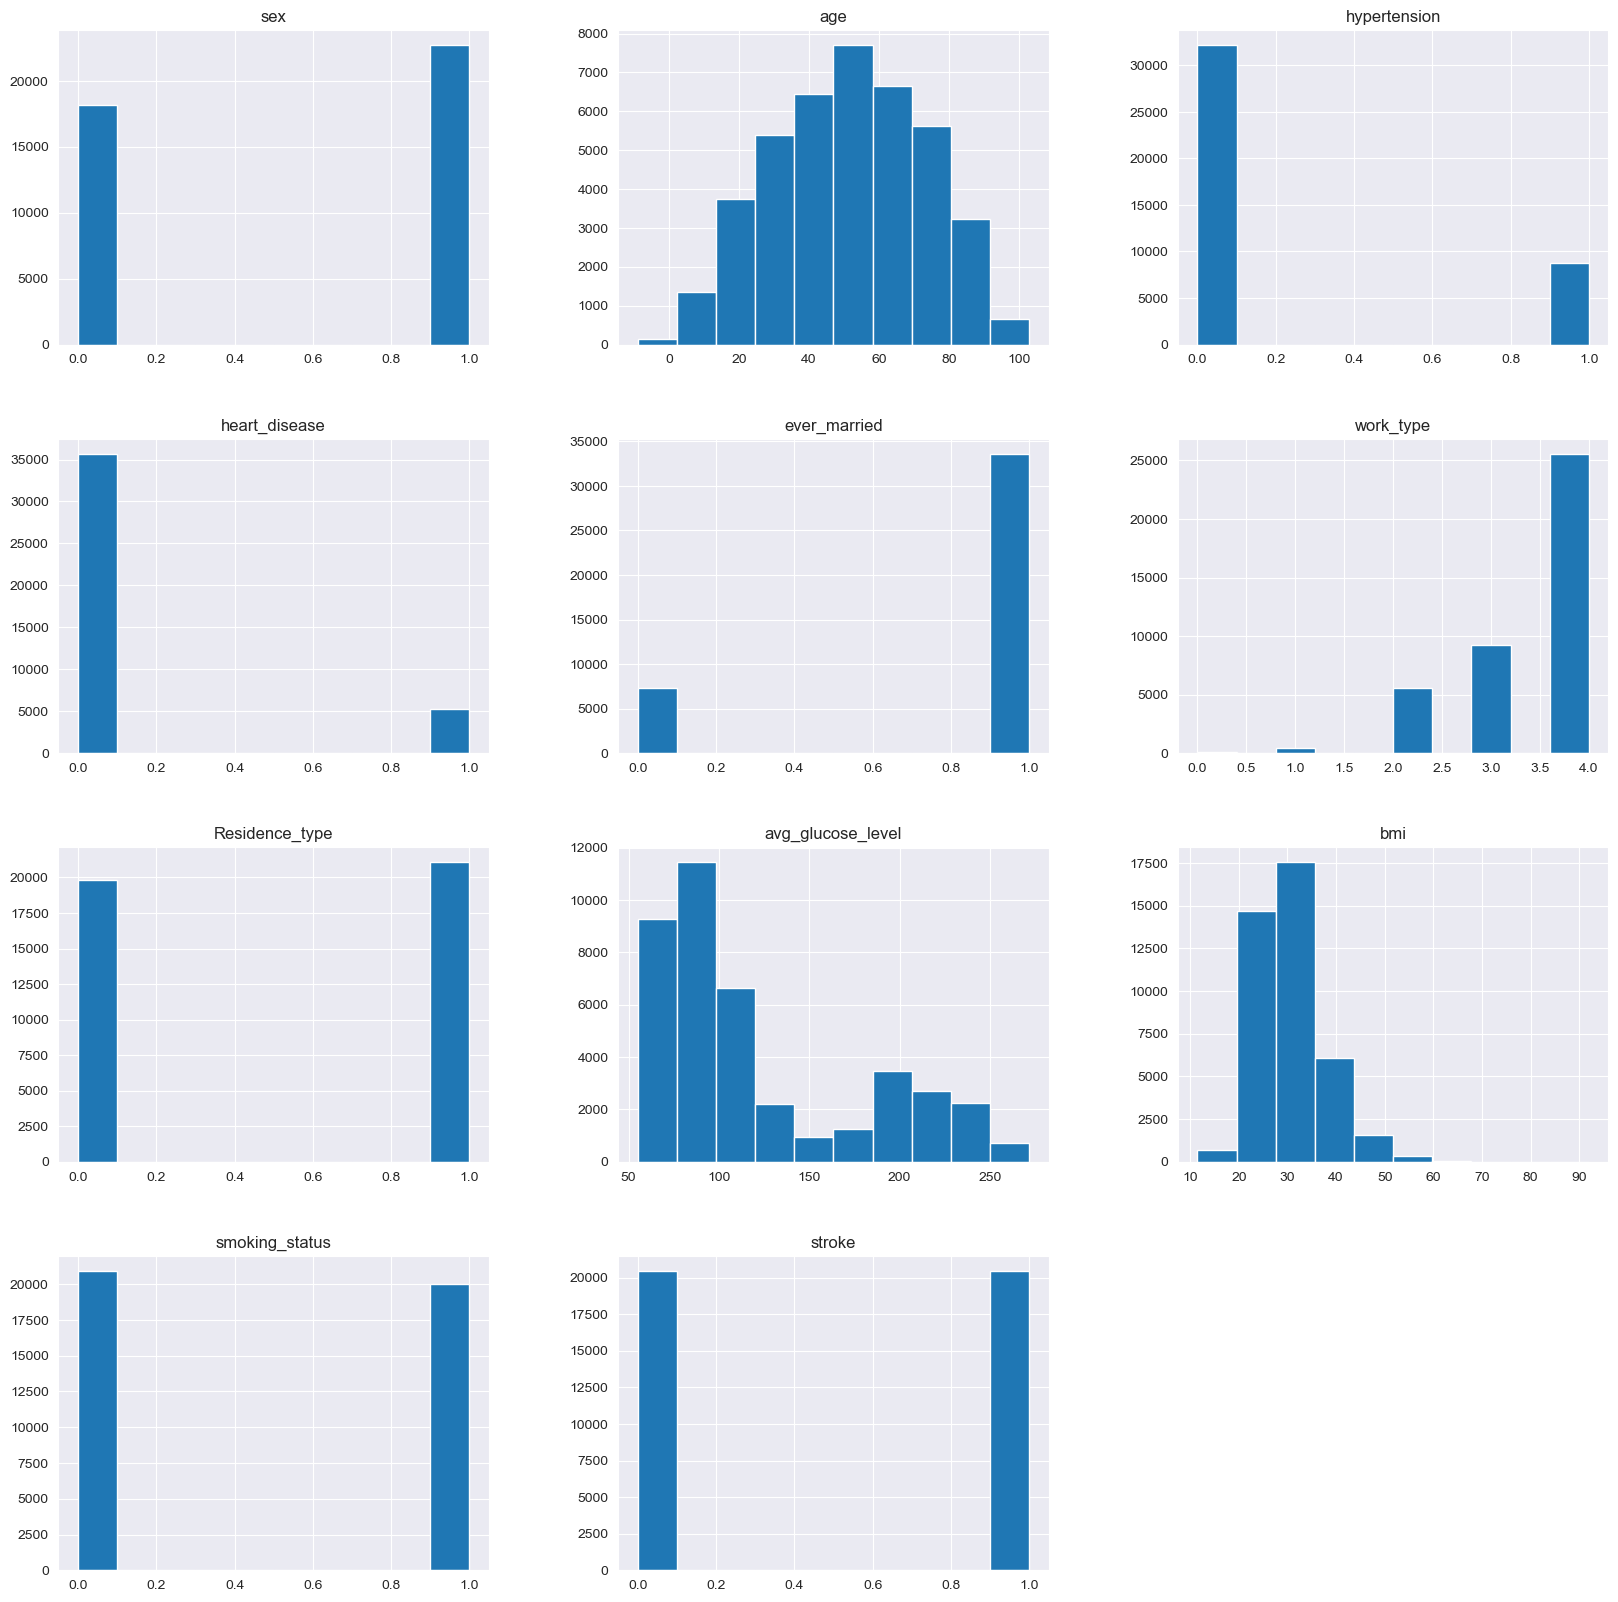

In [62]:
df_stroke.hist(figsize=(20,20))
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

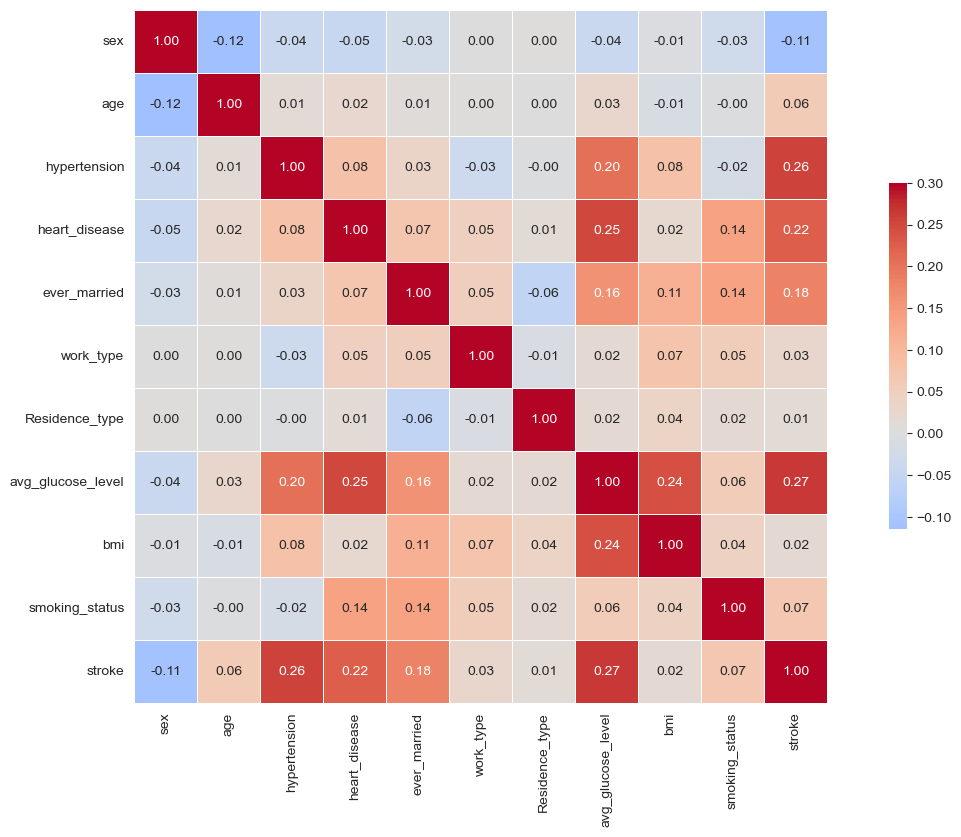

In [4]:
g = sns.heatmap(df_stroke.corr(), vmax=.3, center=0,
                square=True, linewidths=.5, 
                cbar_kws={"shrink": .5}, annot=True, 
                fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(16,9)
plt.show()

In [63]:
df_stroke_ha = df_stroke[['stroke']]== 1
print(df_stroke_ha.stroke.value_counts(), end='\n\n')

stroke
True     20460
False    20447
Name: count, dtype: int64



In [70]:
X=df_stroke.drop('stroke',axis=1)
y=df_stroke['stroke']

In [71]:
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100,stratify=y)

(40907, 10)
(40907,)


In [72]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [73]:
# Best Model Parameter Tunning Stroke
models_stroke_naive = {'Logistic_Regression':LogisticRegression(),
          'DecisionTreeClassifier' : DecisionTreeClassifier(random_state=42),
          'RandomForestClassifier':RandomForestClassifier(),
          'AdaBoostClassifier':AdaBoostClassifier(random_state=42),
          'XGBoost':xgb.XGBClassifier(),
          'SVM':SVC(kernel = 'rbf'), 
          'KNN':KNeighborsClassifier(n_neighbors = 10),
          'Naive_Bayes':GaussianNB(),
          'BernoulliNB' : BernoulliNB()}



Logistic_Regression
              precision    recall  f1-score   support

           0       0.66      0.76      0.70      5112
           1       0.71      0.61      0.66      5115

    accuracy                           0.68     10227
   macro avg       0.69      0.68      0.68     10227
weighted avg       0.69      0.68      0.68     10227



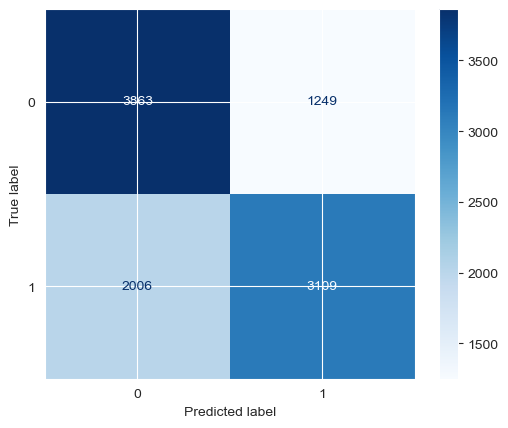

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5112
           1       1.00      1.00      1.00      5115

    accuracy                           1.00     10227
   macro avg       1.00      1.00      1.00     10227
weighted avg       1.00      1.00      1.00     10227



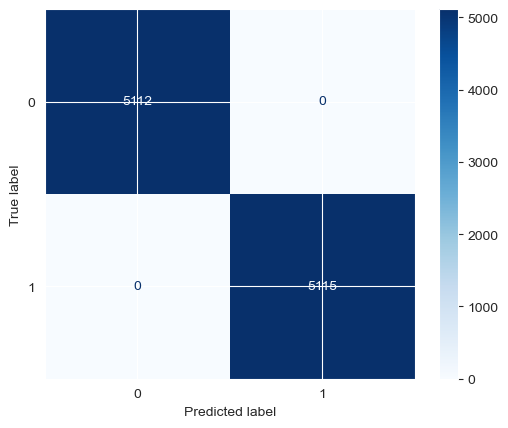

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5112
           1       1.00      1.00      1.00      5115

    accuracy                           1.00     10227
   macro avg       1.00      1.00      1.00     10227
weighted avg       1.00      1.00      1.00     10227



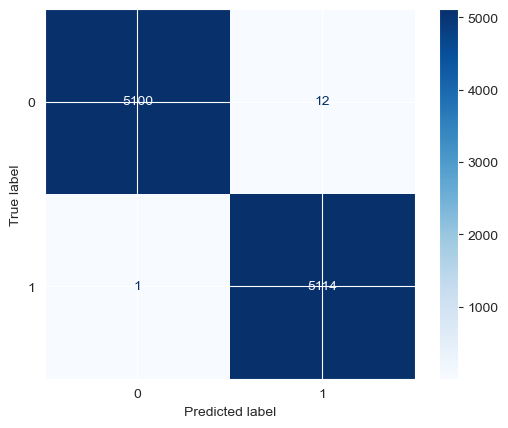

AdaBoostClassifier


C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.69      0.79      0.74      5112
           1       0.75      0.65      0.70      5115

    accuracy                           0.72     10227
   macro avg       0.72      0.72      0.72     10227
weighted avg       0.72      0.72      0.72     10227



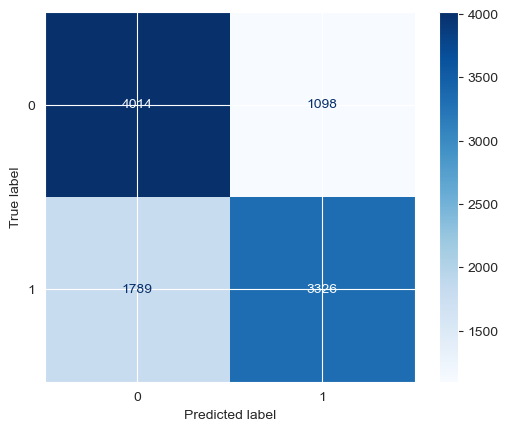

XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5112
           1       1.00      1.00      1.00      5115

    accuracy                           1.00     10227
   macro avg       1.00      1.00      1.00     10227
weighted avg       1.00      1.00      1.00     10227



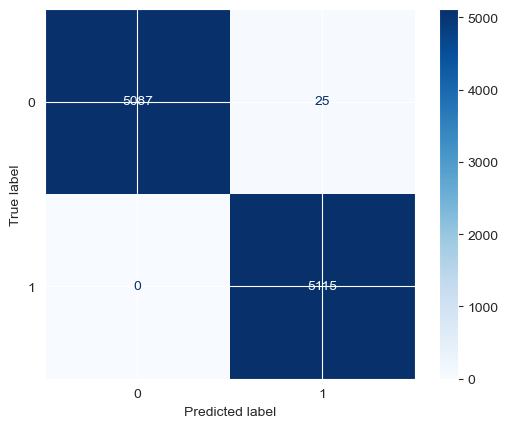

SVM
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      5112
           1       0.76      0.79      0.78      5115

    accuracy                           0.77     10227
   macro avg       0.77      0.77      0.77     10227
weighted avg       0.77      0.77      0.77     10227



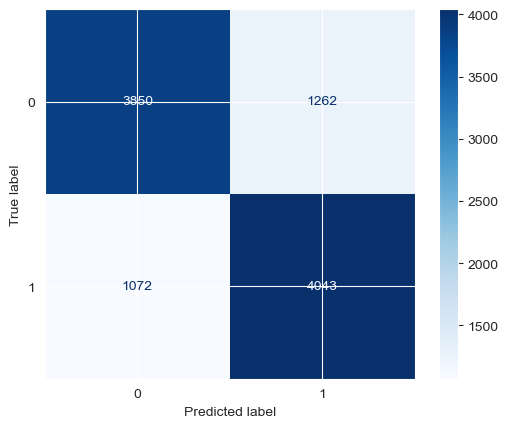

KNN
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      5112
           1       0.80      0.92      0.86      5115

    accuracy                           0.85     10227
   macro avg       0.86      0.85      0.85     10227
weighted avg       0.86      0.85      0.85     10227



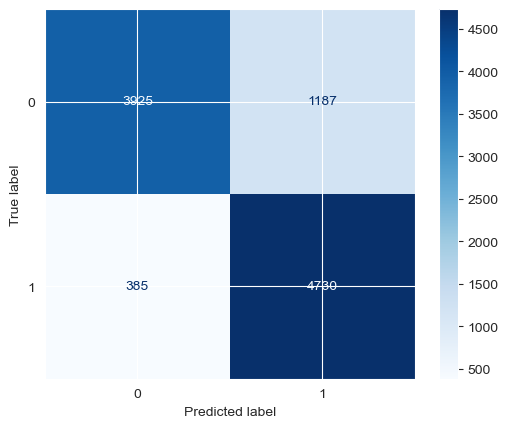

Naive_Bayes
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      5112
           1       0.73      0.54      0.62      5115

    accuracy                           0.67     10227
   macro avg       0.68      0.67      0.67     10227
weighted avg       0.68      0.67      0.67     10227



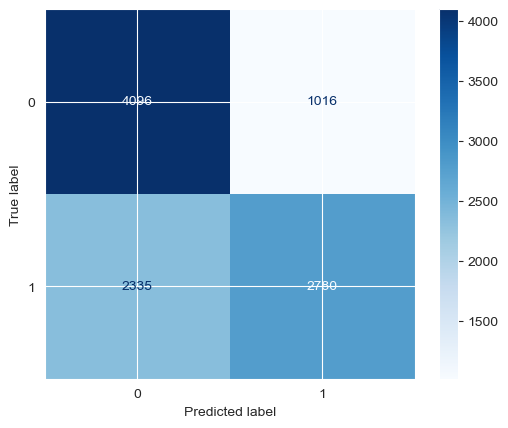

BernoulliNB
              precision    recall  f1-score   support

           0       0.65      0.73      0.69      5112
           1       0.69      0.60      0.64      5115

    accuracy                           0.67     10227
   macro avg       0.67      0.67      0.67     10227
weighted avg       0.67      0.67      0.67     10227



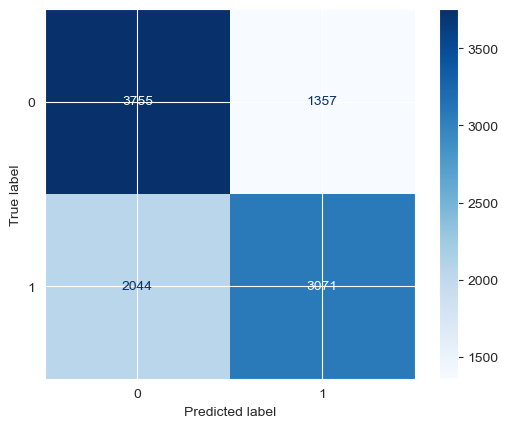

In [74]:
for model_type in models_stroke_naive:
    print(model_type)
    model_train_test(models_stroke_naive[model_type])

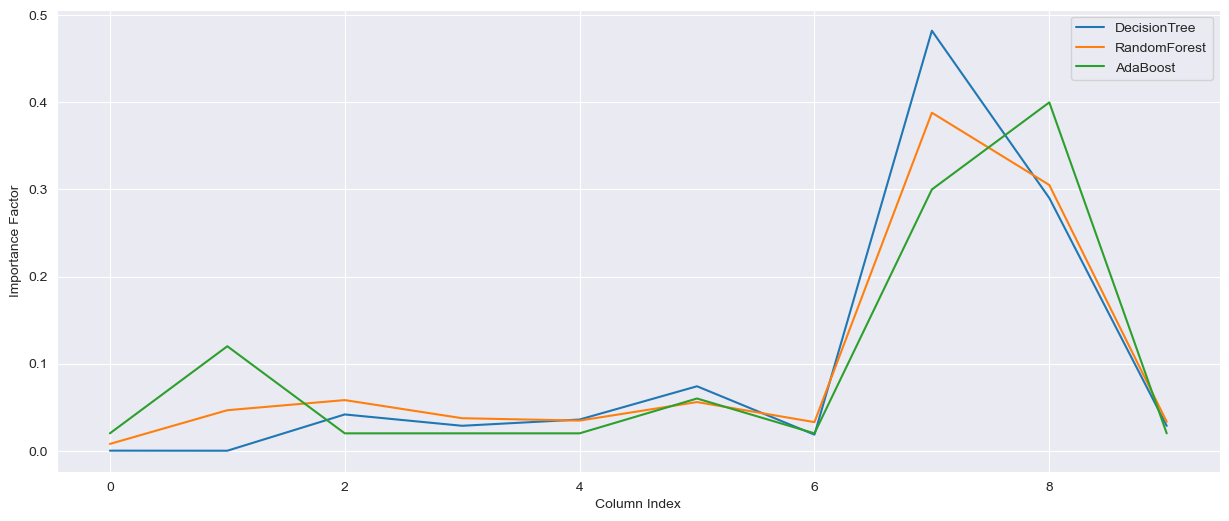

In [35]:
plt.figure(figsize=(15,6))
plt.plot(models_stroke_naive['DecisionTreeClassifier'].feature_importances_, label='DecisionTree')
plt.plot(models_stroke_naive['RandomForestClassifier'].feature_importances_, label='RandomForest')
plt.plot(models_stroke_naive['AdaBoostClassifier'].feature_importances_, label='AdaBoost')
plt.legend()
plt.ylabel('Importance Factor')
plt.xlabel('Column Index')
plt.show()

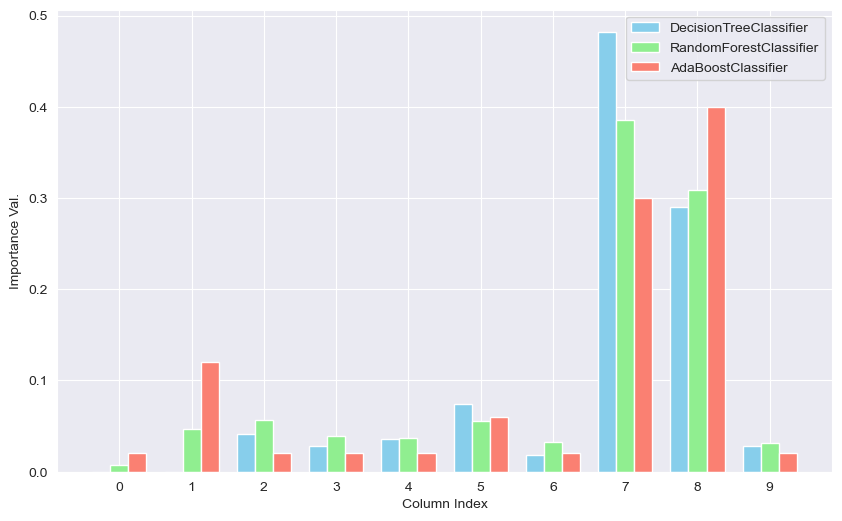

In [75]:
x = np.arange(len(models_stroke_naive['DecisionTreeClassifier'].feature_importances_))  # the label locations

width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each set of values
rects1 = ax.bar(x - width, models_stroke_naive['DecisionTreeClassifier'].feature_importances_, width, label='DecisionTreeClassifier', color='skyblue')
rects2 = ax.bar(x, models_stroke_naive['RandomForestClassifier'].feature_importances_, width, label='RandomForestClassifier', color='lightgreen')
rects3 = ax.bar(x + width, models_stroke_naive['AdaBoostClassifier'].feature_importances_, width, label='AdaBoostClassifier', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Column Index')
ax.set_ylabel('Importance Val.')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

plt.show()

In [37]:
dt = models_stroke_naive['DecisionTreeClassifier']
rf = models_stroke_naive['RandomForestClassifier']
ab = models_stroke_naive['AdaBoostClassifier']

dt_ranks = get_tree_model_feature_rank(dt)
rf_ranks = get_tree_model_feature_rank(rf)
ab_ranks = get_tree_model_feature_rank(ab)

rank = pd.DataFrame({'DecisionTree':dt_ranks, 
                     'RandomForest':rf_ranks,
                     'AdaBoostClassifier':ab_ranks}).set_index(X_train.columns)
print(rank)


C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

                   DecisionTree  RandomForest  AdaBoostClassifier
sex                           3             4                   4
age                           4             1                   1
hypertension                  1             1                   3
heart_disease                 1             1                   1
ever_married                  1             1                   1
work_type                     1             1                   1
Residence_type                2             2                   2
avg_glucose_level             1             1                   1
bmi                           1             1                   1
smoking_status                1             3                   1


In [38]:
# drop not corraleted columns with stroke
data_cleaned_stroke=df_stroke.drop(['sex','Residence_type'],axis=1)
data_cleaned_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40907 entries, 0 to 40909
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                40907 non-null  float64
 1   hypertension       40907 non-null  int64  
 2   heart_disease      40907 non-null  int64  
 3   ever_married       40907 non-null  int64  
 4   work_type          40907 non-null  int64  
 5   avg_glucose_level  40907 non-null  float64
 6   bmi                40907 non-null  float64
 7   smoking_status     40907 non-null  int64  
 8   stroke             40907 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 3.1 MB


In [103]:
X = data_cleaned_stroke.drop('stroke', axis=1)
y = df_stroke['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, stratify=y)
scaler_stroke = StandardScaler()
X_train_scaled = scaler_stroke.fit_transform(X_train)
X_test_scaled = scaler_stroke.transform(X_test)

In [104]:
# no need for hyperparameter tuning
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
print(rfc.score(X_test_scaled, y_test))
pred_y = rfc.predict(X_test_scaled)
print(classification_report(y_test, pred_y))


0.9965776865160849
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5112
           1       0.99      1.00      1.00      5115

    accuracy                           1.00     10227
   macro avg       1.00      1.00      1.00     10227
weighted avg       1.00      1.00      1.00     10227



In [105]:
import pickle

#save model
with open('best_model_stroke.pkl','wb') as f:
    pickle.dump(rfc,f)

In [107]:
#save scaler

with open('stroke_scaler.pkl','wb') as f:
    pickle.dump(scaler_stroke,f)

* Hypertension dataset analysis

In [64]:
df_hypertension=pd.read_csv('C:\\Users\ERAY\PycharmProjects\\790project\hypertension_data.csv')
df_hypertension.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


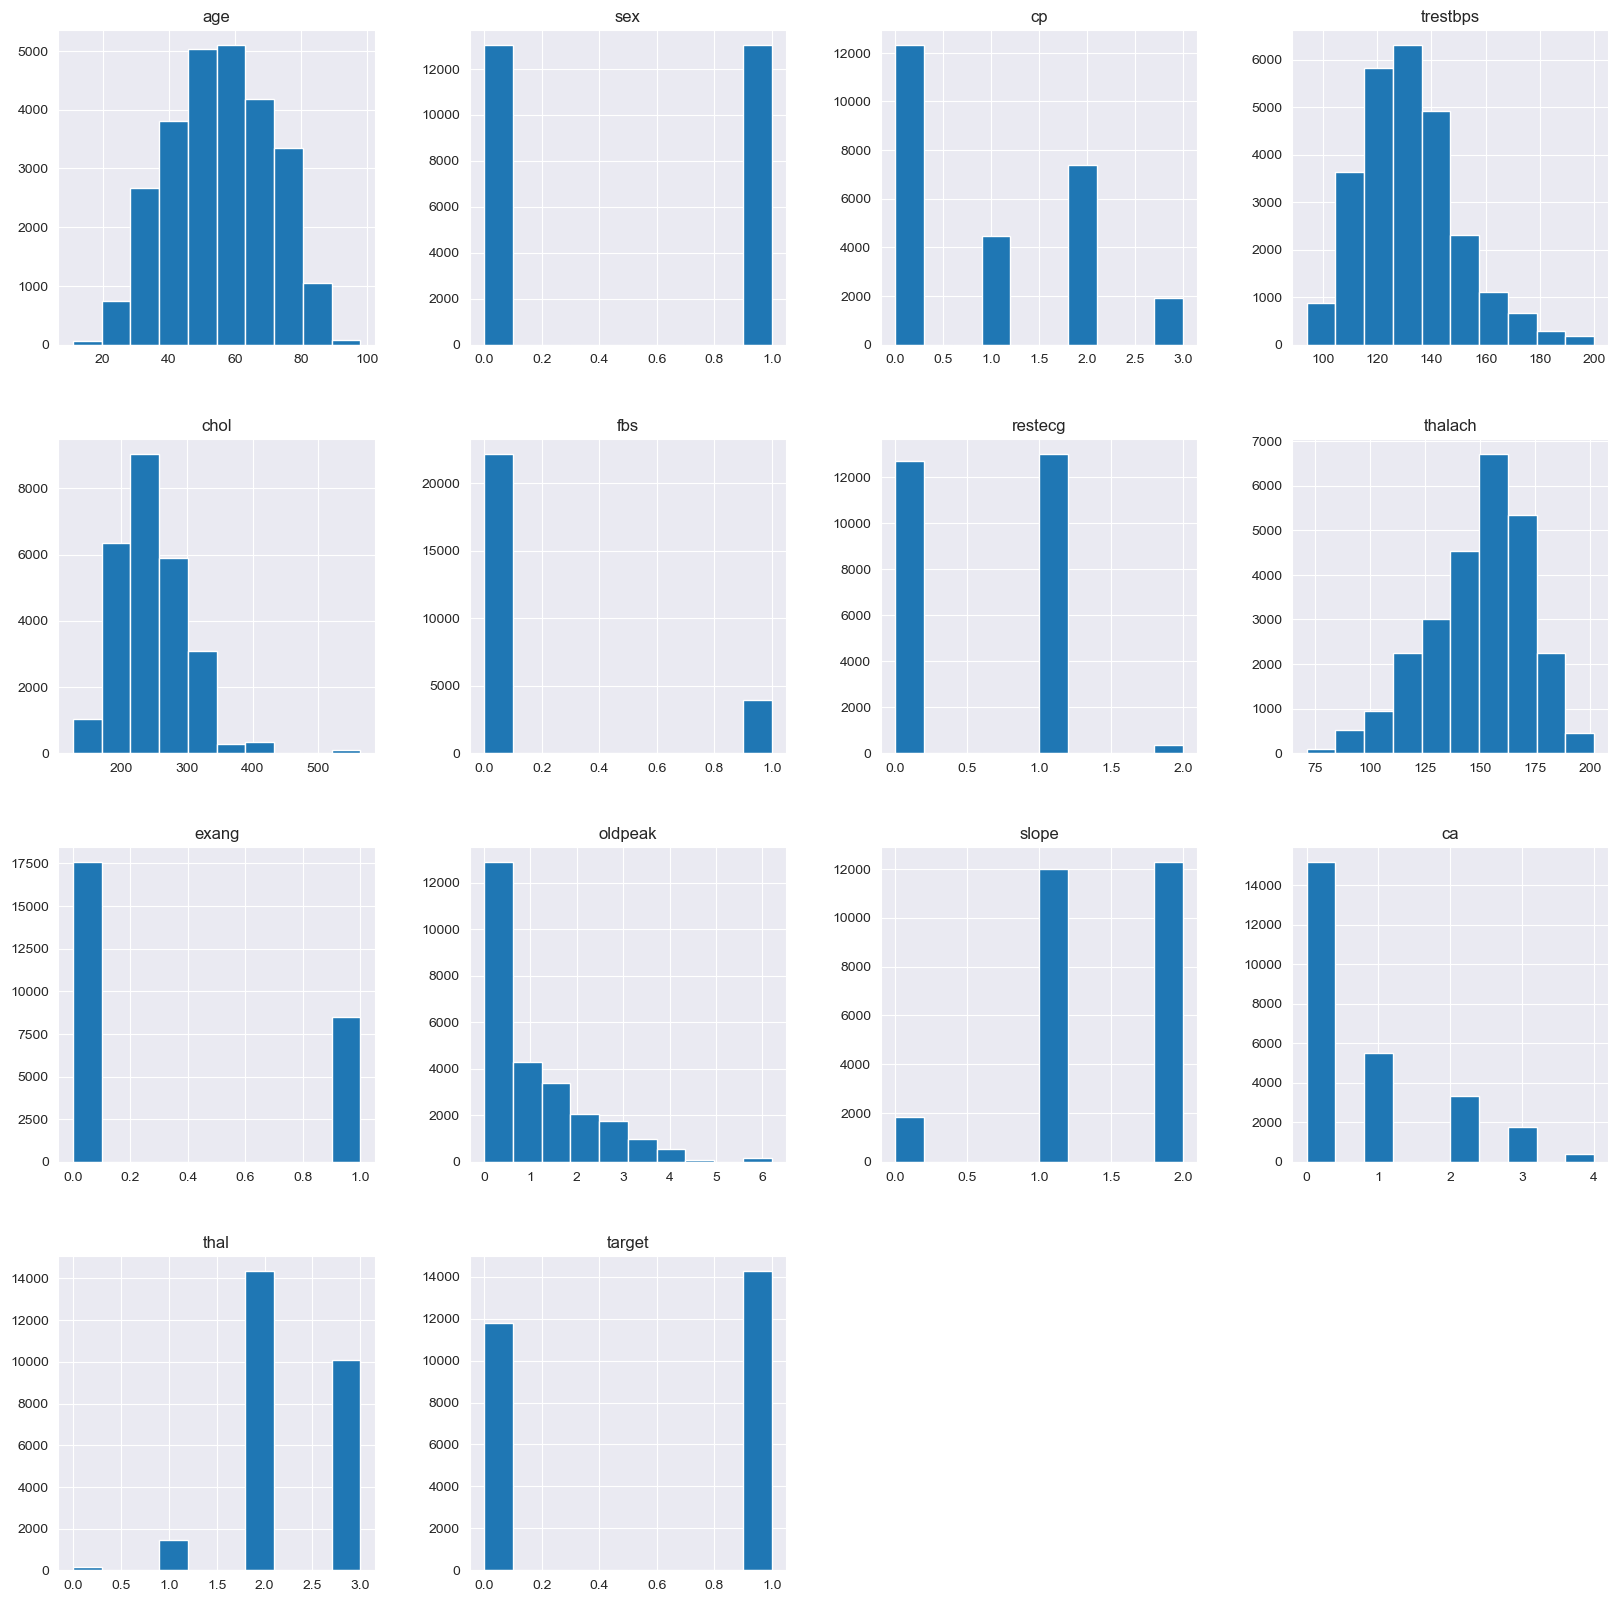

In [65]:
df_hypertension.hist(figsize=(20,20))
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [66]:
df_hypertension.isnull().sum()
df_hypertension = df_hypertension.dropna()

In [68]:
df_hypertension_ha = df_hypertension[['target']]== 1
print(df_hypertension_ha.target.value_counts(), end='\n\n')

target
True     14274
False    11784
Name: count, dtype: int64



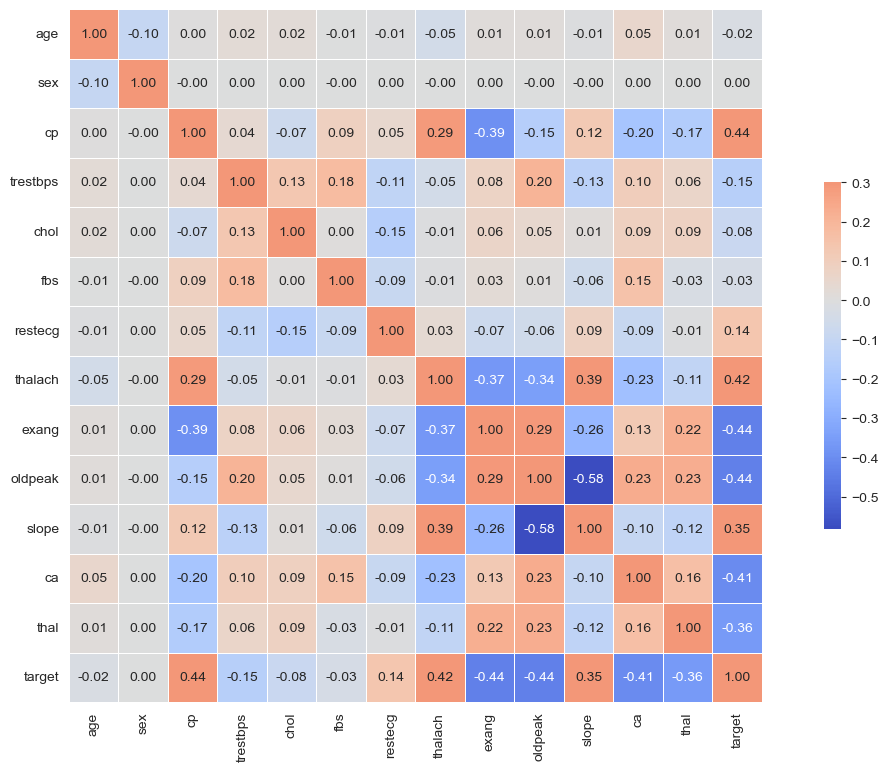

In [66]:
g = sns.heatmap(df_hypertension.corr(), vmax=.3, center=0,
                square=True, linewidths=.5, 
                cbar_kws={"shrink": .5}, annot=True, 
                fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(16,9)
plt.show()

In [72]:
X = df_hypertension.drop('target', axis=1)
print(X.info())
y = df_hypertension['target']

<class 'pandas.core.frame.DataFrame'>
Index: 26058 entries, 0 to 26082
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26058 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26058 non-null  int64  
 3   trestbps  26058 non-null  int64  
 4   chol      26058 non-null  int64  
 5   fbs       26058 non-null  int64  
 6   restecg   26058 non-null  int64  
 7   thalach   26058 non-null  int64  
 8   exang     26058 non-null  int64  
 9   oldpeak   26058 non-null  float64
 10  slope     26058 non-null  int64  
 11  ca        26058 non-null  int64  
 12  thal      26058 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.8 MB
None


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Best Model Parameter Tunning Stroke
models_hypertension_naive = {'Logistic_Regression': LogisticRegression(),
                       'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
                       'RandomForestClassifier': RandomForestClassifier(),
                       'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
                       'XGBoost': xgb.XGBClassifier(),
                       'SVM': SVC(kernel='rbf'),
                       'KNN': KNeighborsClassifier(n_neighbors=10),
                       'Naive_Bayes': GaussianNB(),
                       'BernoulliNB': BernoulliNB()}

Logistic_Regression
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2946
           1       0.83      0.93      0.88      3569

    accuracy                           0.86      6515
   macro avg       0.87      0.85      0.85      6515
weighted avg       0.86      0.86      0.86      6515



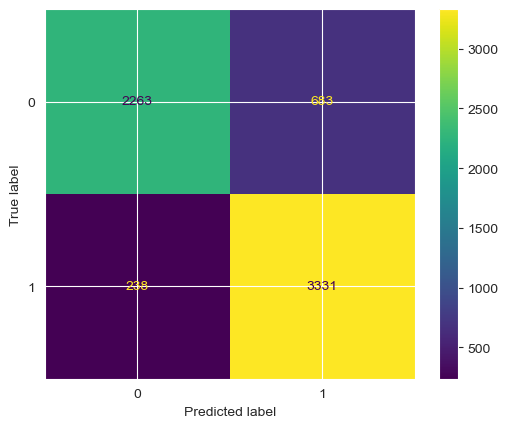

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2946
           1       1.00      1.00      1.00      3569

    accuracy                           1.00      6515
   macro avg       1.00      1.00      1.00      6515
weighted avg       1.00      1.00      1.00      6515



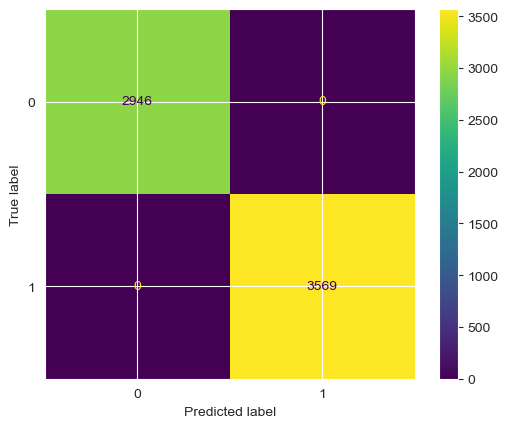

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2946
           1       1.00      1.00      1.00      3569

    accuracy                           1.00      6515
   macro avg       1.00      1.00      1.00      6515
weighted avg       1.00      1.00      1.00      6515



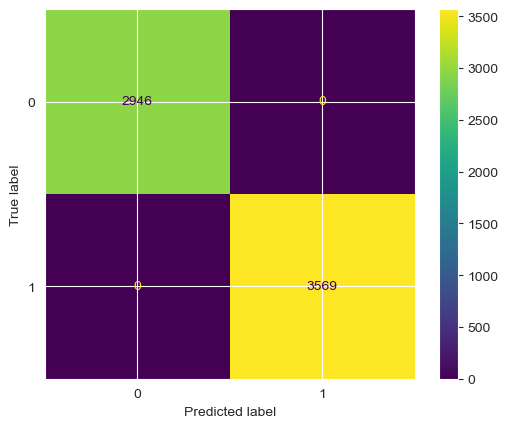

AdaBoostClassifier


C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2946
           1       0.90      0.93      0.91      3569

    accuracy                           0.90      6515
   macro avg       0.91      0.90      0.90      6515
weighted avg       0.91      0.90      0.90      6515



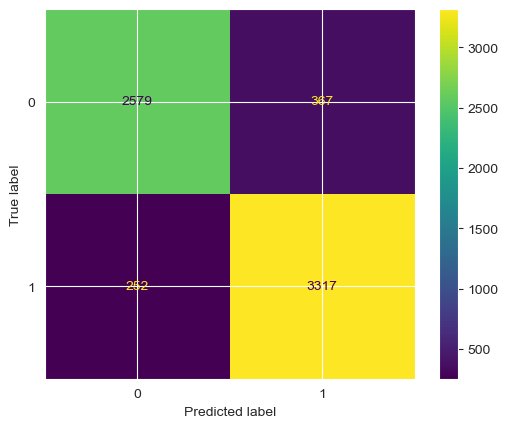

XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2946
           1       1.00      1.00      1.00      3569

    accuracy                           1.00      6515
   macro avg       1.00      1.00      1.00      6515
weighted avg       1.00      1.00      1.00      6515



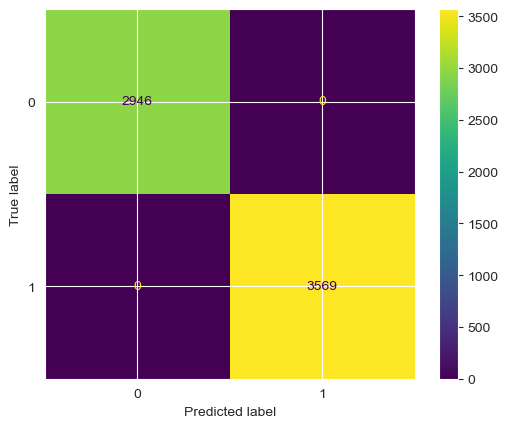

SVM
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2946
           1       0.97      0.99      0.98      3569

    accuracy                           0.98      6515
   macro avg       0.98      0.98      0.98      6515
weighted avg       0.98      0.98      0.98      6515



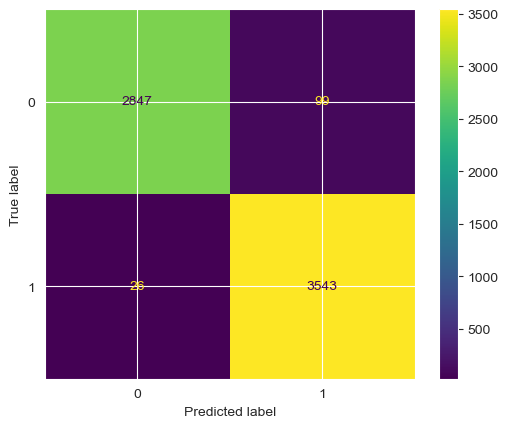

KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2946
           1       1.00      1.00      1.00      3569

    accuracy                           1.00      6515
   macro avg       1.00      1.00      1.00      6515
weighted avg       1.00      1.00      1.00      6515



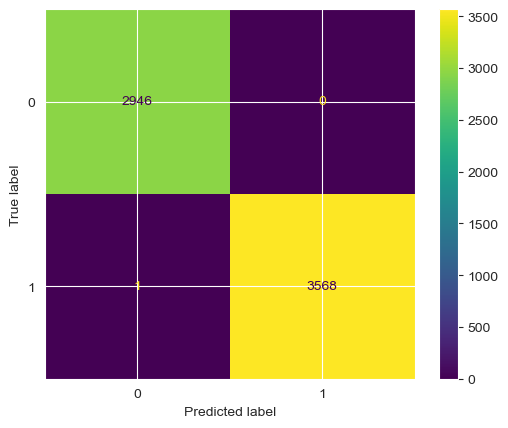

Naive_Bayes
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2946
           1       0.82      0.87      0.84      3569

    accuracy                           0.82      6515
   macro avg       0.82      0.82      0.82      6515
weighted avg       0.82      0.82      0.82      6515



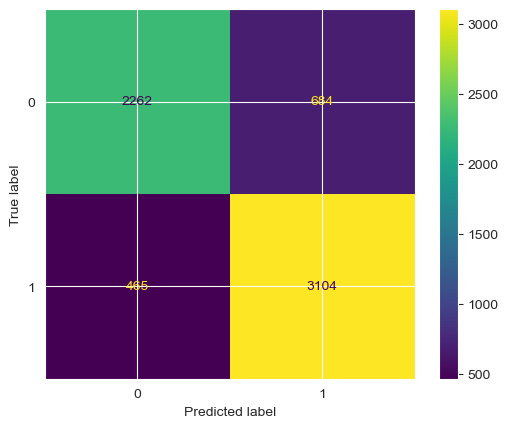

BernoulliNB
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2946
           1       0.83      0.88      0.86      3569

    accuracy                           0.84      6515
   macro avg       0.84      0.84      0.84      6515
weighted avg       0.84      0.84      0.84      6515



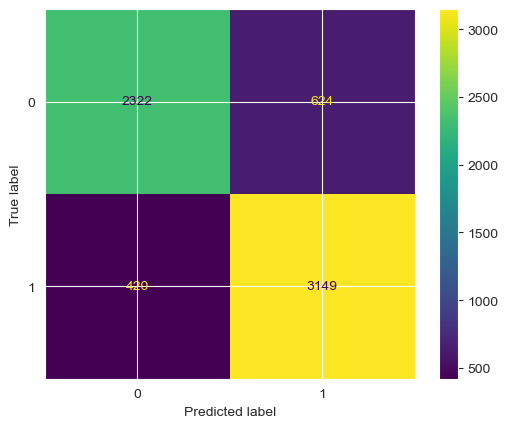

In [70]:
for model_type in models_hypertension_naive:
    print(model_type)
    model_train_test(models_hypertension_naive[model_type])

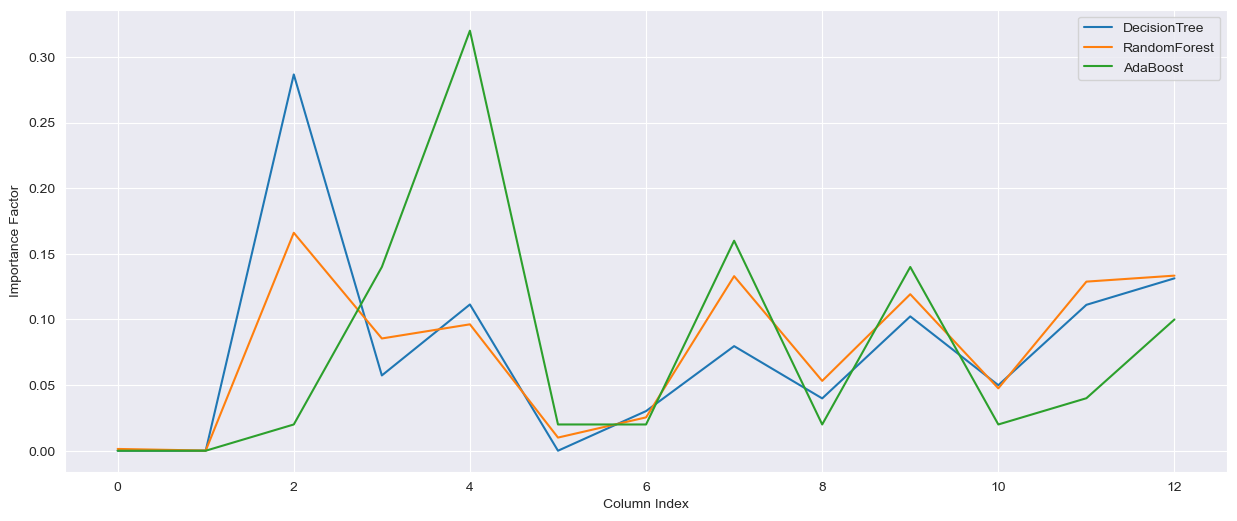

In [74]:
plt.figure(figsize=(15,6))
plt.plot(models_hypertension_naive['DecisionTreeClassifier'].feature_importances_, label='DecisionTree')
plt.plot(models_hypertension_naive['RandomForestClassifier'].feature_importances_, label='RandomForest')
plt.plot(models_hypertension_naive['AdaBoostClassifier'].feature_importances_, label='AdaBoost')
plt.legend()
plt.ylabel('Importance Factor')
plt.xlabel('Column Index')
plt.show()

In [ ]:
x = np.arange(len(models_hypertension_naive['DecisionTreeClassifier'].feature_importances_))  # the label locations

width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each set of values
rects1 = ax.bar(x - width, models_hypertension_naive['DecisionTreeClassifier'].feature_importances_, width, label='DecisionTreeClassifier', color='skyblue')
rects2 = ax.bar(x, models_hypertension_naive['RandomForestClassifier'].feature_importances_, width, label='RandomForestClassifier', color='lightgreen')
rects3 = ax.bar(x + width, models_hypertension_naive['AdaBoostClassifier'].feature_importances_, width, label='AdaBoostClassifier', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Column Index')
ax.set_ylabel('Importance Val.')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

plt.show()

In [84]:
dt = models_hypertension_naive['DecisionTreeClassifier']
rf = models_hypertension_naive['RandomForestClassifier']
ab = models_hypertension_naive['AdaBoostClassifier']

dt_ranks = get_tree_model_feature_rank(dt)
rf_ranks = get_tree_model_feature_rank(rf)
ab_ranks = get_tree_model_feature_rank(ab)

rank = pd.DataFrame({'DecisionTree':dt_ranks, 
                     'RandomForest':rf_ranks,
                     'AdaBoostClassifier':ab_ranks}).set_index(X_train.columns)
print(rank)

C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

          DecisionTree  RandomForest  AdaBoostClassifier
age                  7             6                   7
sex                  6             7                   6
cp                   1             1                   5
trestbps             1             1                   1
chol                 1             1                   1
fbs                  5             5                   4
restecg              4             4                   3
thalach              1             1                   1
exang                2             2                   2
oldpeak              1             1                   1
slope                3             3                   1
ca                   1             1                   1
thal                 1             1                   1


In [56]:

# DROP AGE, SEX, fbs, restecg
df_hypertension_eliminated = df_hypertension.drop(['age','sex', 'fbs','restecg'], axis=1)
X = df_hypertension_eliminated.drop('target', axis=1)
Y = df_hypertension_eliminated['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, stratify=y)
scaler_hypertension = StandardScaler()
X_train_scaled = scaler_hypertension.fit_transform(X_train)
X_test_scaled = scaler_hypertension.transform(X_test)

<bound method DataFrame.info of        cp  trestbps  chol  thalach  exang  oldpeak  slope  ca  thal  target
0       3       145   233      150      0      2.3      0   0     1       1
1       2       130   250      187      0      3.5      0   0     2       1
2       1       130   204      172      0      1.4      2   0     2       1
3       1       120   236      178      0      0.8      2   0     2       1
4       0       120   354      163      1      0.6      2   0     2       1
...    ..       ...   ...      ...    ...      ...    ...  ..   ...     ...
26078   0       138   294      106      0      1.9      1   3     2       0
26079   0       144   200      126      1      0.9      1   0     3       0
26080   0       100   234      156      0      0.1      2   1     3       0
26081   1       154   232      164      0      0.0      2   1     2       0
26082   1       130   236      174      0      0.0      1   1     2       0

[26058 rows x 10 columns]>


NameError: name 'y' is not defined

In [57]:
df_hypertension_eliminated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26058 entries, 0 to 26082
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cp        26058 non-null  int64  
 1   trestbps  26058 non-null  int64  
 2   chol      26058 non-null  int64  
 3   thalach   26058 non-null  int64  
 4   exang     26058 non-null  int64  
 5   oldpeak   26058 non-null  float64
 6   slope     26058 non-null  int64  
 7   ca        26058 non-null  int64  
 8   thal      26058 non-null  int64  
 9   target    26058 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.2 MB


In [99]:
# no need for hyperparameter tuning
dc = DecisionTreeClassifier()
dc.fit(X_train_scaled, y_train)
print(dc.score(X_test_scaled, y_test))
pred_y = dc.predict(X_test_scaled)
print(classification_report(y_test, pred_y))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2946
           1       1.00      1.00      1.00      3569

    accuracy                           1.00      6515
   macro avg       1.00      1.00      1.00      6515
weighted avg       1.00      1.00      1.00      6515



In [100]:
import pickle
#save model
with open('best_model_hypertension.pkl', 'wb') as f:
    pickle.dump(dc, f)


In [101]:
#save scaler

with open('hypertension_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_hypertension, f)

* Diabetes dataset analysis

In [4]:
df_diabetes=pd.read_csv('C:\\Users\ERAY\PycharmProjects\\790project\diabetes_012_health_indicators_BRFSS2015.csv')
#df_diabetes = df_diabetes.drop('HeartDiseaseorAttack', axis= 1)
df_diabetes.info()
df_diabetes.dropna()
print(df_diabetes.Diabetes_012.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

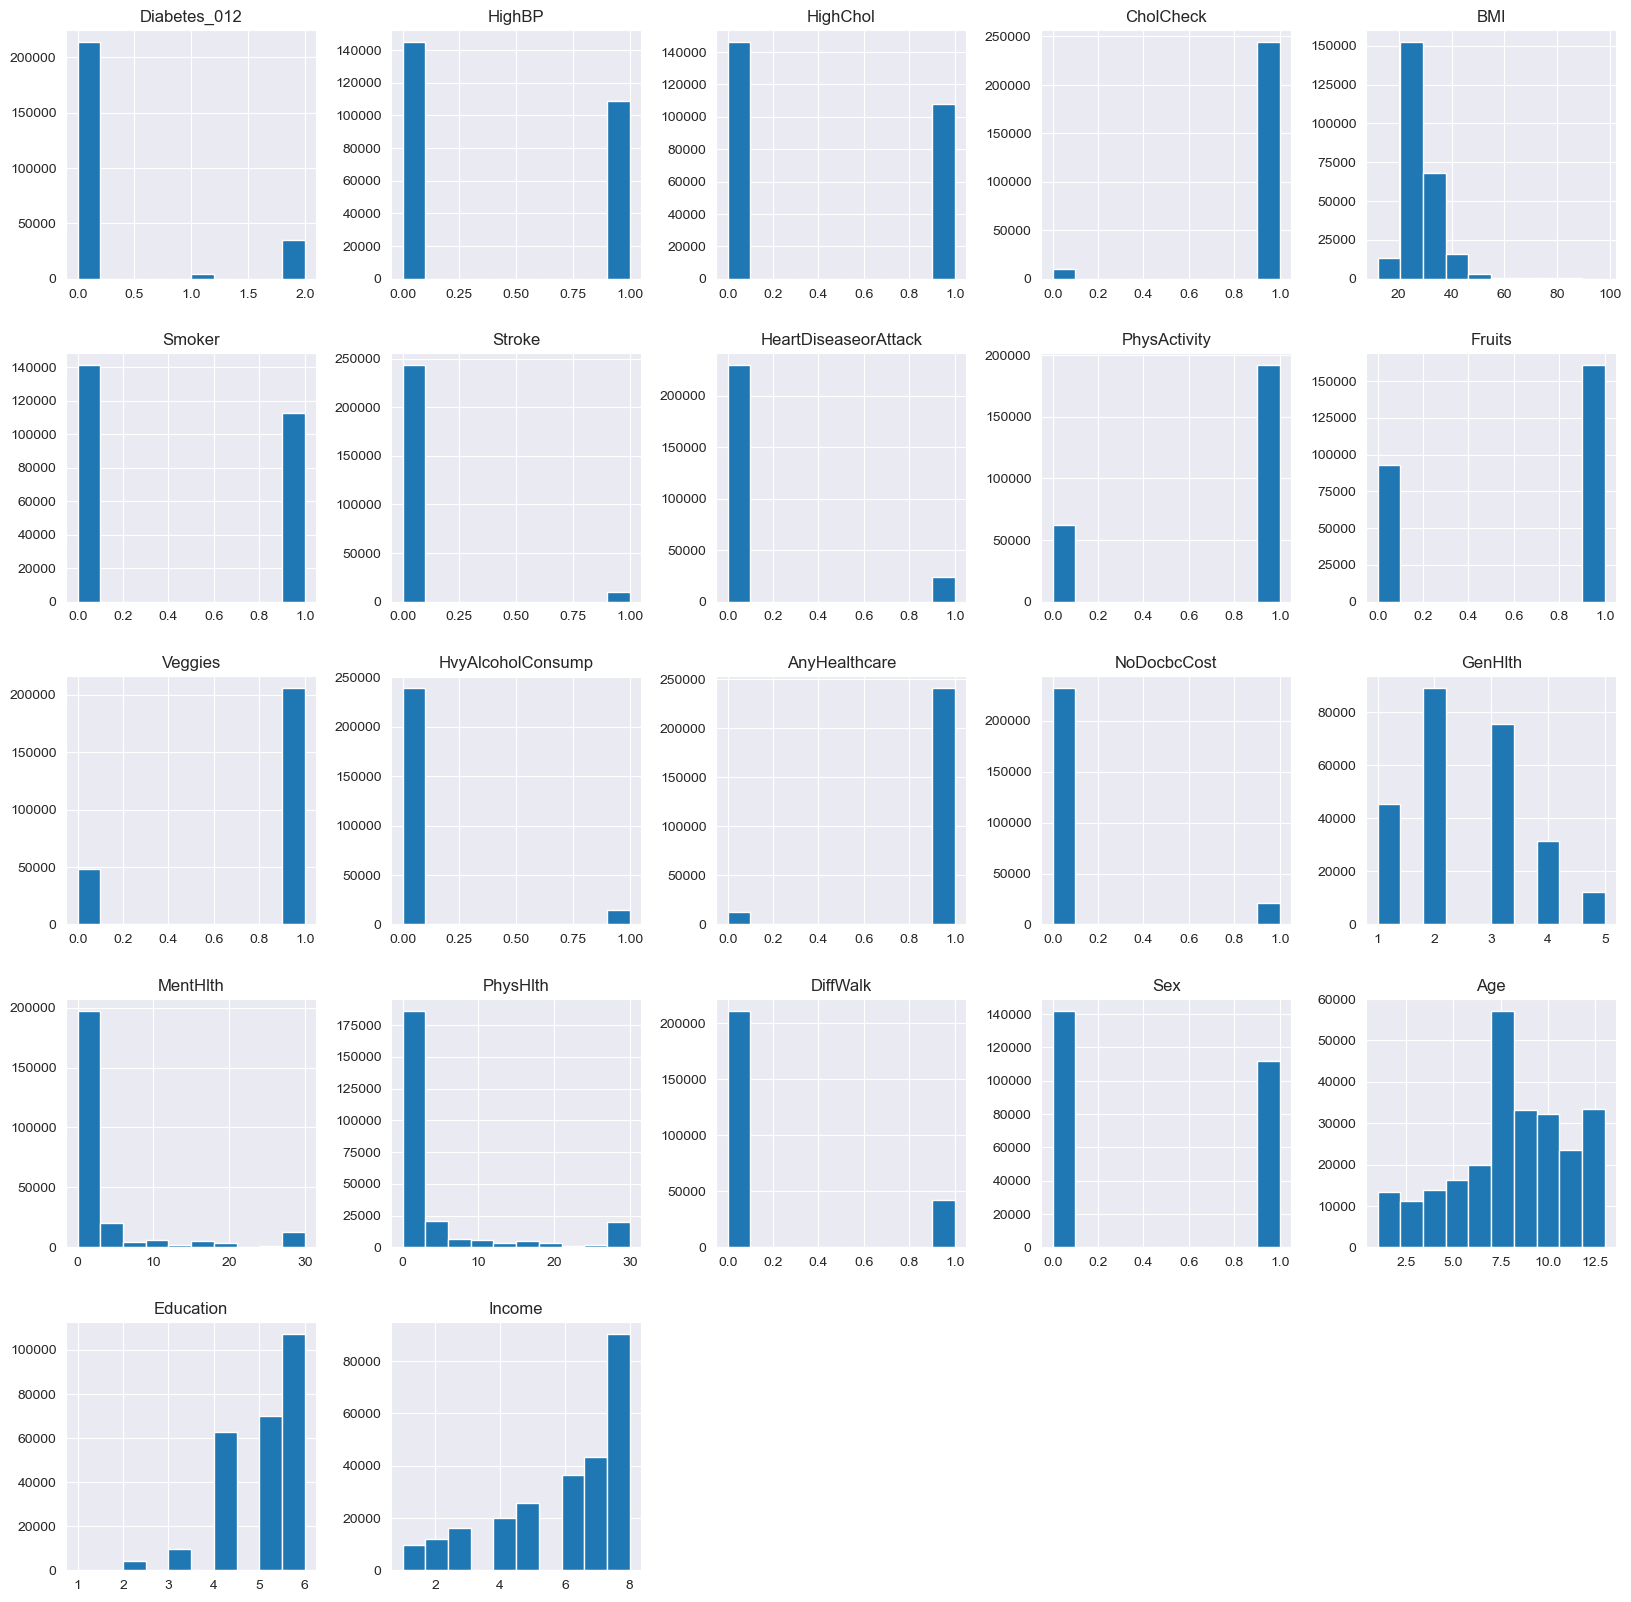

In [109]:
df_diabetes.hist(figsize=(20,20))
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [5]:
df_diabetes = df_diabetes.loc[df_diabetes['Diabetes_012'] != 1]
df_diabetes.loc[df_diabetes['Diabetes_012'] == 2, 'Diabetes_012'] = 1
print(df_diabetes.Diabetes_012.value_counts())

Diabetes_012
0.0    213703
1.0     35346
Name: count, dtype: int64


<Axes: >

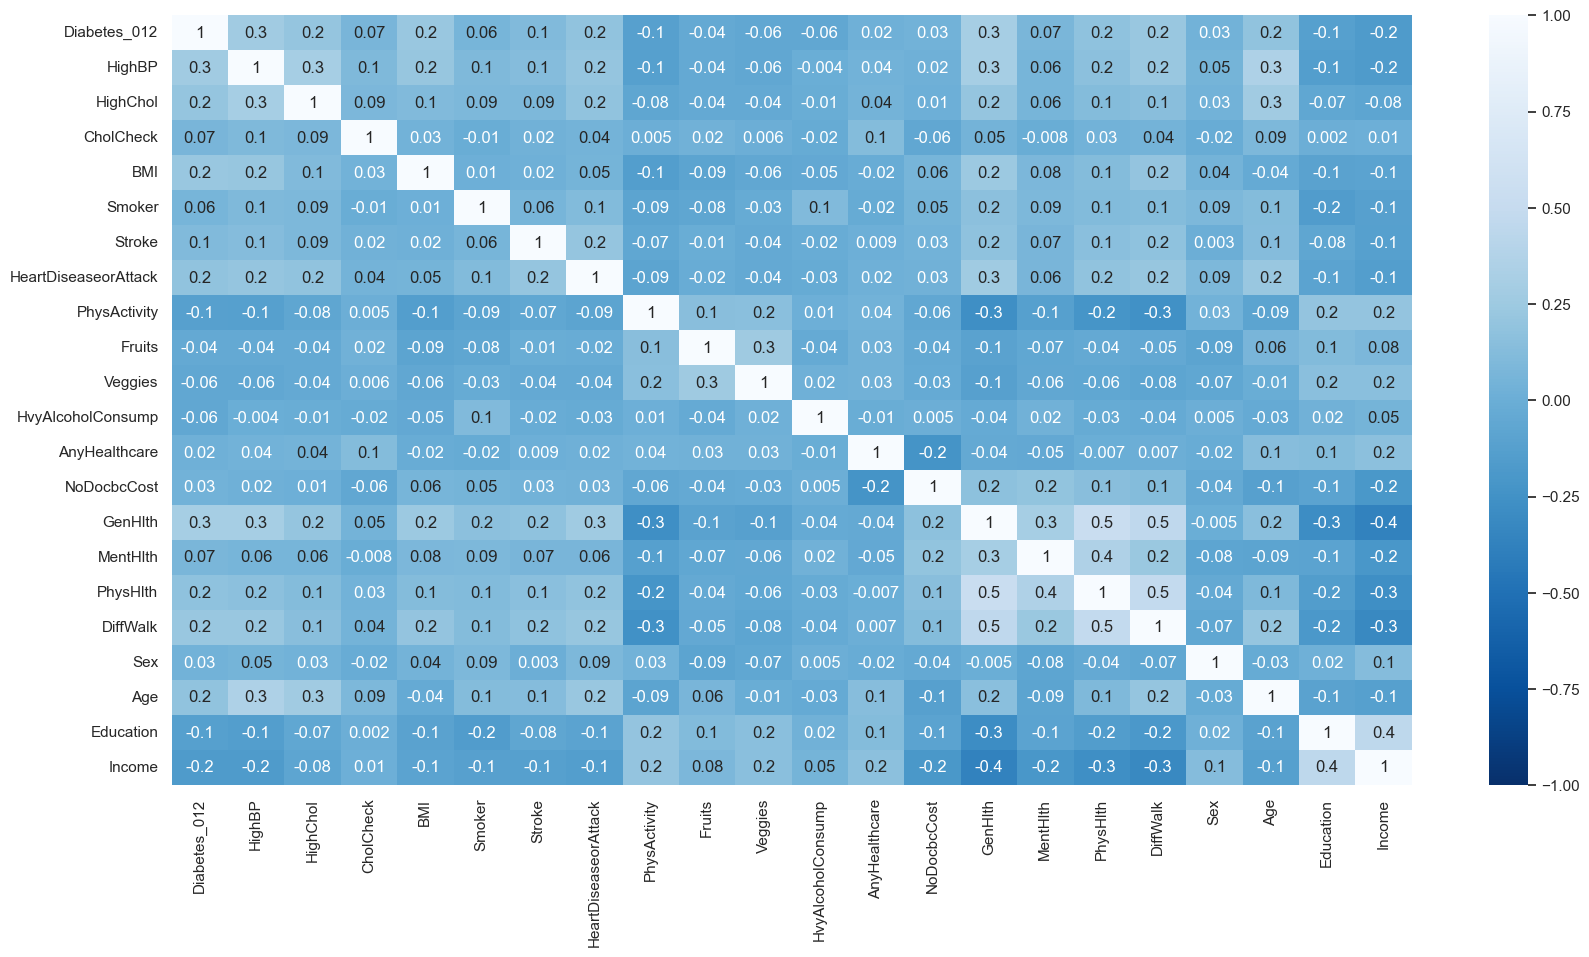

In [112]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df_diabetes.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'Blues_r')

In [5]:
# not changed dataset
X_diabetes = df_diabetes.drop('Diabetes_012', axis=1)
Y_diabetes = df_diabetes['Diabetes_012']


In [9]:
# TRY smote here 
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()

X_diabetes_OverS, Y_diabetes_OverS = oversampler.fit_resample(X_diabetes, Y_diabetes)
print(Y_diabetes_OverS.value_counts())

Diabetes_012
0.0    213703
1.0    213703
Name: count, dtype: int64


In [ ]:
# Add data from heart attack dataset
# Add just diabetes data
# TODO Add heart attack risk data here 


In [22]:
# Try undersampling here with random selection
df_diabetes_under = df_diabetes.loc[df_diabetes['Diabetes_012'] != 1].sample(35346)
df_diabetes_under.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35346 entries, 73950 to 143858
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          35346 non-null  float64
 1   HighBP                35346 non-null  float64
 2   HighChol              35346 non-null  float64
 3   CholCheck             35346 non-null  float64
 4   BMI                   35346 non-null  float64
 5   Smoker                35346 non-null  float64
 6   Stroke                35346 non-null  float64
 7   HeartDiseaseorAttack  35346 non-null  float64
 8   PhysActivity          35346 non-null  float64
 9   Fruits                35346 non-null  float64
 10  Veggies               35346 non-null  float64
 11  HvyAlcoholConsump     35346 non-null  float64
 12  AnyHealthcare         35346 non-null  float64
 13  NoDocbcCost           35346 non-null  float64
 14  GenHlth               35346 non-null  float64
 15  MentHlth           

In [23]:
# Undersampled dataset
df_diabetes_under = pd.concat([df_diabetes_under, df_diabetes.loc[df_diabetes['Diabetes_012'] == 1]])
X_diabetes_underS = df_diabetes_under.drop('Diabetes_012', axis=1)
Y_diabetes_underS = df_diabetes_under['Diabetes_012']
print(df_diabetes_under.shape)

(70692, 22)
Diabetes_012  HighBP  HighChol  CholCheck  BMI   Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age   Education  Income
0.0           0.0     0.0       1.0        20.0  0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          1.0      0.0       0.0       0.0       0.0  7.0   6.0        8.0       10
                                           22.0  0.0     0.0     0.0                   1.0           1.0     1.0      0.0                1.0            0.0          1.0      0.0       0.0       0.0       0.0  6.0   6.0        8.0       10
                                                                                                                                                                                                                 7.0   6.0        8.0        9
                                      

In [6]:
# for normal dataset test
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, Y_diabetes, test_size=0.25, random_state=100, stratify=Y_diabetes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_diabetes_OverS, Y_diabetes_OverS, test_size=0.25, random_state=100, stratify=Y_diabetes_OverS)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_diabetes_underS, Y_diabetes_underS, test_size=0.25, random_state=100, stratify=Y_diabetes_underS)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Best Model Parameter Tunning Stroke
models_diabetes_naive = {'Logistic_Regression': LogisticRegression(),
                       'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
                       'RandomForestClassifier': RandomForestClassifier(),
                       'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
                       'XGBoost': xgb.XGBClassifier(),
                       #'SVM': SVC(kernel='rbf'), => time limit exceed, not converge
                       'KNN': KNeighborsClassifier(n_neighbors=10),
                       'Naive_Bayes': GaussianNB(),
                       'BernoulliNB': BernoulliNB()}

models_diabetes_Over = {'Logistic_Regression': LogisticRegression(),
                       'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
                       'RandomForestClassifier': RandomForestClassifier(),
                       'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
                       'XGBoost': xgb.XGBClassifier(),
                       #'SVM': SVC(kernel='rbf'),=> time limit exceed, not converge
                       'KNN': KNeighborsClassifier(n_neighbors=10),
                       'Naive_Bayes': GaussianNB(),
                       'BernoulliNB': BernoulliNB()}

models_diabetes_under = {'Logistic_Regression': LogisticRegression(),
                       'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
                       'RandomForestClassifier': RandomForestClassifier(),
                       'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
                       'XGBoost': xgb.XGBClassifier(),
                       #'SVM': SVC(kernel='rbf'),=> time limit exceed, not converge
                       'KNN': KNeighborsClassifier(n_neighbors=10),
                       'Naive_Bayes': GaussianNB(),
                       'BernoulliNB': BernoulliNB()}

Logistic_Regression
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     53426
         1.0       0.55      0.17      0.27      8837

    accuracy                           0.86     62263
   macro avg       0.71      0.58      0.59     62263
weighted avg       0.83      0.86      0.83     62263



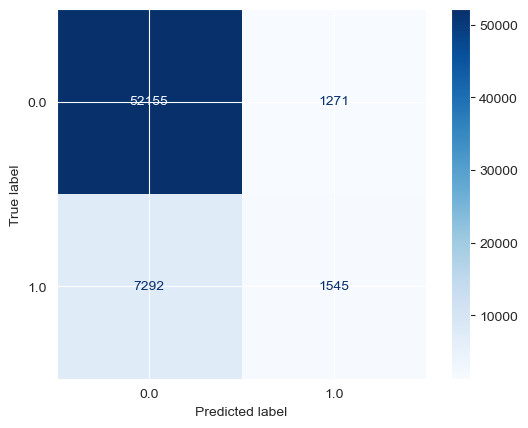

DecisionTreeClassifier
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     53426
         1.0       0.30      0.33      0.32      8837

    accuracy                           0.80     62263
   macro avg       0.59      0.60      0.60     62263
weighted avg       0.80      0.80      0.80     62263



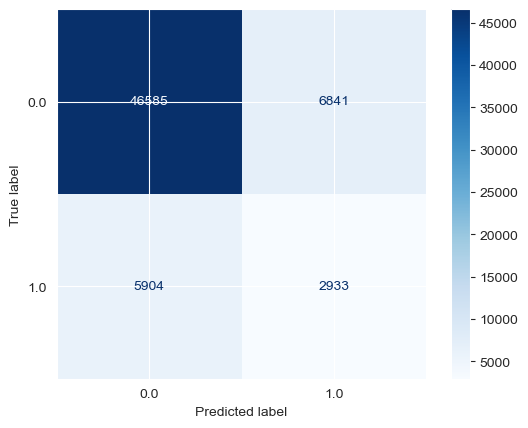

RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     53426
         1.0       0.50      0.20      0.28      8837

    accuracy                           0.86     62263
   macro avg       0.69      0.58      0.60     62263
weighted avg       0.83      0.86      0.83     62263



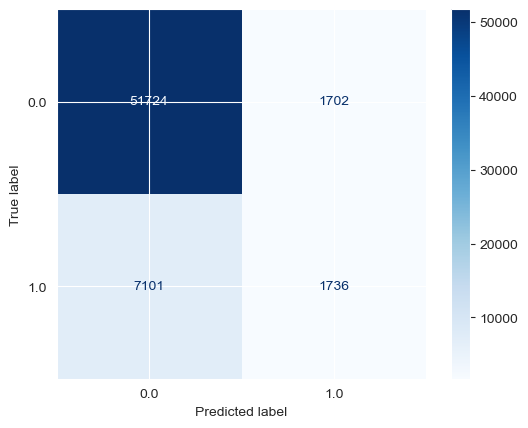

AdaBoostClassifier


C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     53426
         1.0       0.56      0.22      0.31      8837

    accuracy                           0.86     62263
   macro avg       0.72      0.59      0.62     62263
weighted avg       0.84      0.86      0.84     62263



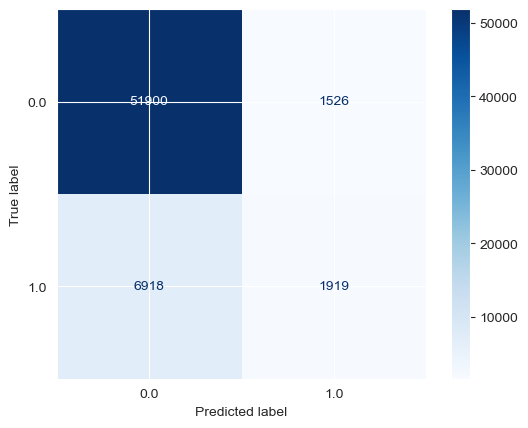

XGBoost
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     53426
         1.0       0.56      0.20      0.29      8837

    accuracy                           0.86     62263
   macro avg       0.72      0.59      0.61     62263
weighted avg       0.84      0.86      0.84     62263



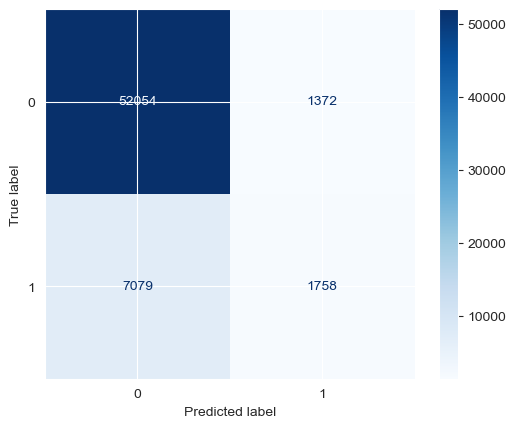

KNN
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     53426
         1.0       0.49      0.13      0.21      8837

    accuracy                           0.86     62263
   macro avg       0.68      0.55      0.56     62263
weighted avg       0.82      0.86      0.82     62263



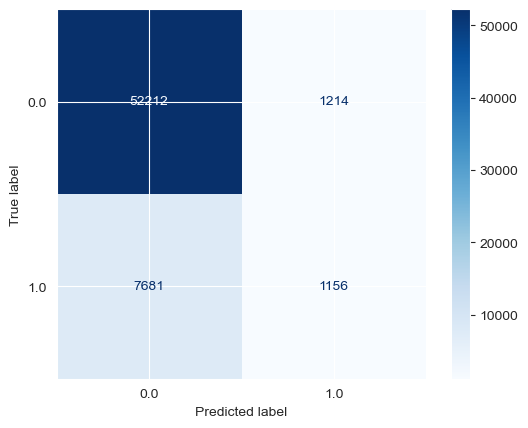

Naive_Bayes
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     53426
         1.0       0.33      0.58      0.42      8837

    accuracy                           0.78     62263
   macro avg       0.63      0.69      0.64     62263
weighted avg       0.84      0.78      0.80     62263



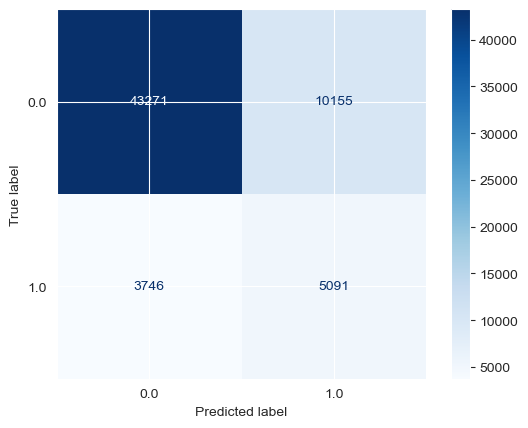

BernoulliNB
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     53426
         1.0       0.39      0.50      0.44      8837

    accuracy                           0.82     62263
   macro avg       0.65      0.68      0.66     62263
weighted avg       0.84      0.82      0.83     62263



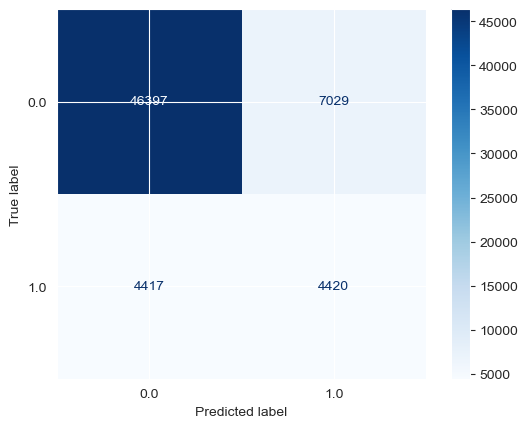

In [8]:
# Training for normal set
for model_type in models_diabetes_naive:
    print(model_type)
    model_train_test(models_diabetes_naive[model_type])
    

Logistic_Regression
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75     53426
         1.0       0.75      0.79      0.77     53426

    accuracy                           0.76    106852
   macro avg       0.76      0.76      0.76    106852
weighted avg       0.76      0.76      0.76    106852



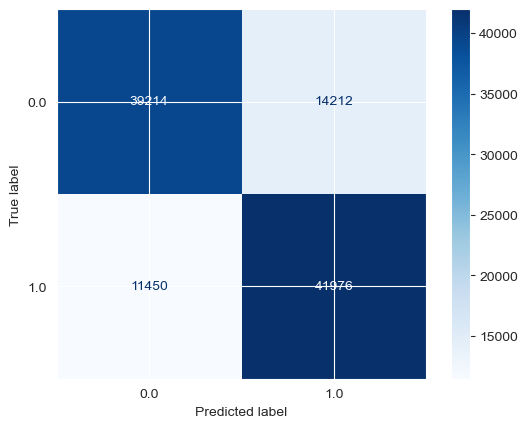

DecisionTreeClassifier
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87     53426
         1.0       0.87      0.88      0.88     53426

    accuracy                           0.88    106852
   macro avg       0.88      0.88      0.88    106852
weighted avg       0.88      0.88      0.88    106852



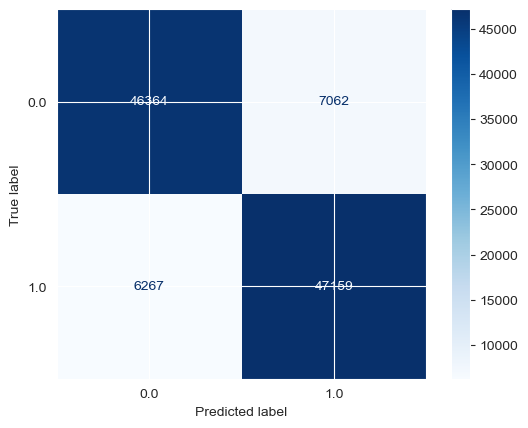

RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     53426
         1.0       0.95      0.88      0.92     53426

    accuracy                           0.92    106852
   macro avg       0.92      0.92      0.92    106852
weighted avg       0.92      0.92      0.92    106852



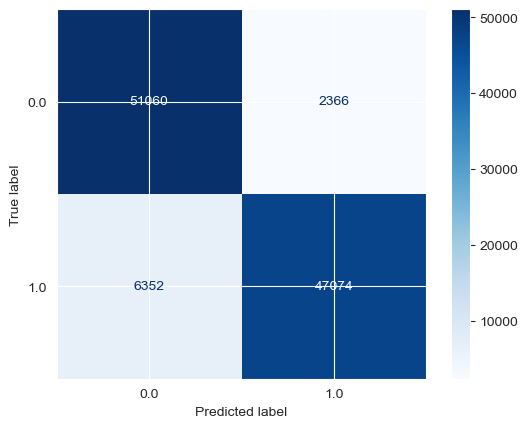

AdaBoostClassifier


C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     53426
         1.0       0.86      0.87      0.87     53426

    accuracy                           0.87    106852
   macro avg       0.87      0.87      0.87    106852
weighted avg       0.87      0.87      0.87    106852



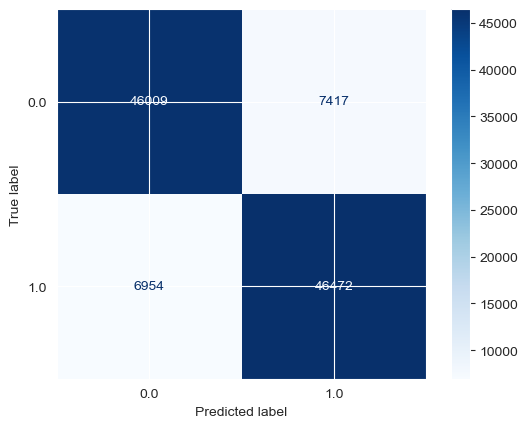

XGBoost
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     53426
         1.0       0.97      0.86      0.91     53426

    accuracy                           0.92    106852
   macro avg       0.92      0.92      0.92    106852
weighted avg       0.92      0.92      0.92    106852



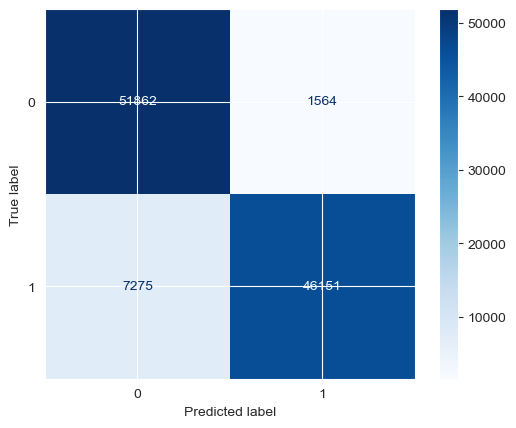

KNN
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83     53426
         1.0       0.83      0.83      0.83     53426

    accuracy                           0.83    106852
   macro avg       0.83      0.83      0.83    106852
weighted avg       0.83      0.83      0.83    106852



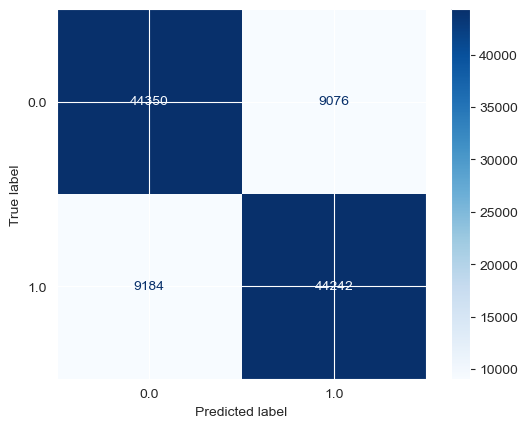

Naive_Bayes
              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72     53426
         1.0       0.71      0.79      0.75     53426

    accuracy                           0.74    106852
   macro avg       0.74      0.74      0.74    106852
weighted avg       0.74      0.74      0.74    106852



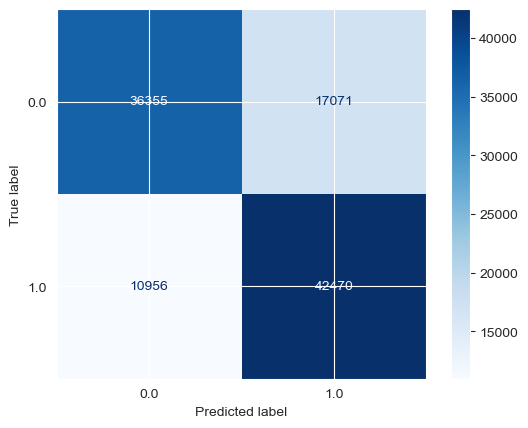

BernoulliNB
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74     53426
         1.0       0.74      0.71      0.73     53426

    accuracy                           0.73    106852
   macro avg       0.73      0.73      0.73    106852
weighted avg       0.73      0.73      0.73    106852



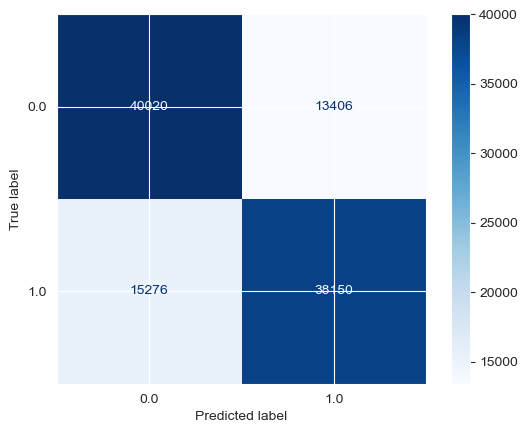

In [12]:
# Training for over sampling
for model_type in models_diabetes_Over:
    print(model_type)
    model_train_test(models_diabetes_Over[model_type])

Logistic_Regression
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      8837
         1.0       0.74      0.77      0.76      8836

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



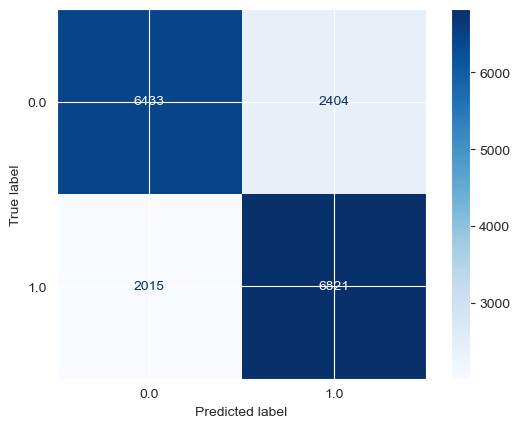

DecisionTreeClassifier
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66      8837
         1.0       0.66      0.65      0.65      8836

    accuracy                           0.66     17673
   macro avg       0.66      0.66      0.66     17673
weighted avg       0.66      0.66      0.66     17673



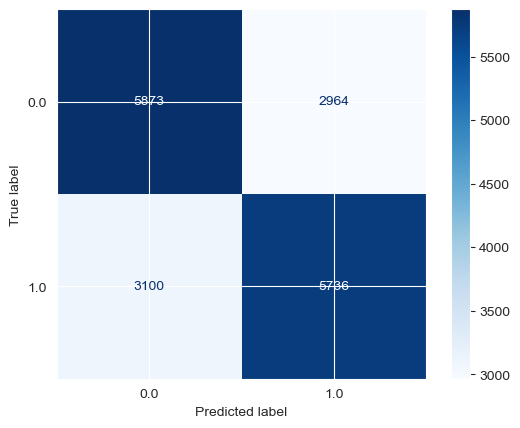

RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73      8837
         1.0       0.73      0.78      0.75      8836

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



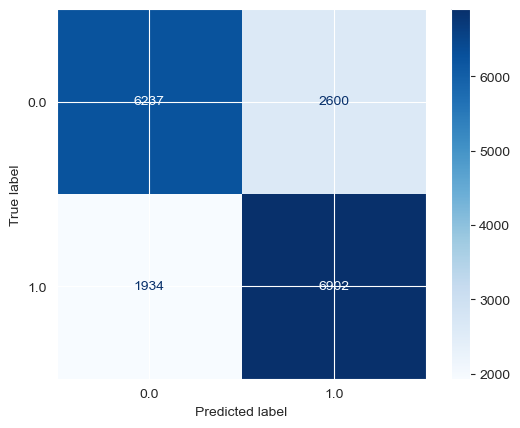

AdaBoostClassifier


C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75      8837
         1.0       0.74      0.77      0.76      8836

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



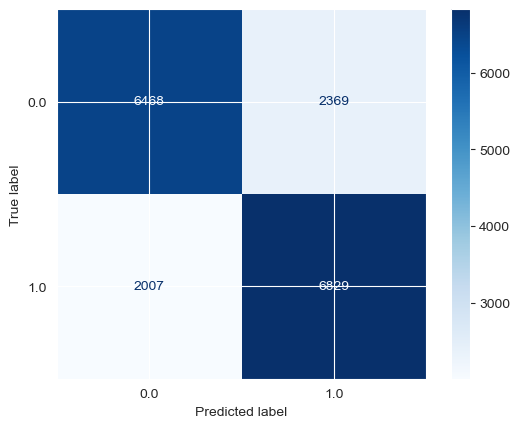

XGBoost
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      8837
         1.0       0.73      0.79      0.76      8836

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



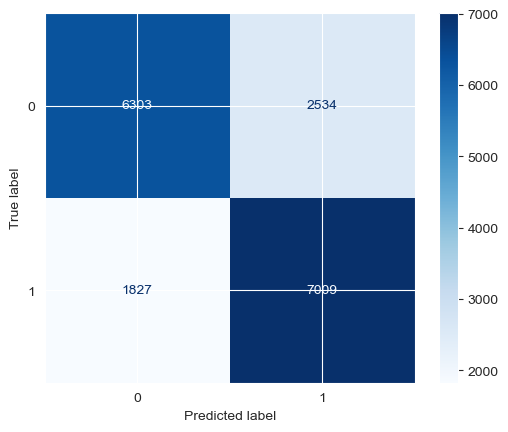

KNN
              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73      8837
         1.0       0.73      0.71      0.72      8836

    accuracy                           0.72     17673
   macro avg       0.72      0.72      0.72     17673
weighted avg       0.72      0.72      0.72     17673



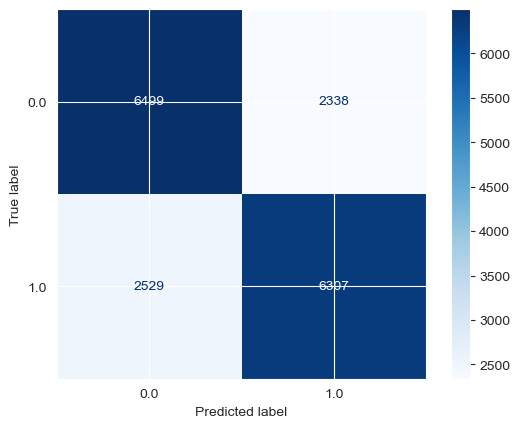

Naive_Bayes
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      8837
         1.0       0.72      0.70      0.71      8836

    accuracy                           0.72     17673
   macro avg       0.72      0.72      0.72     17673
weighted avg       0.72      0.72      0.72     17673



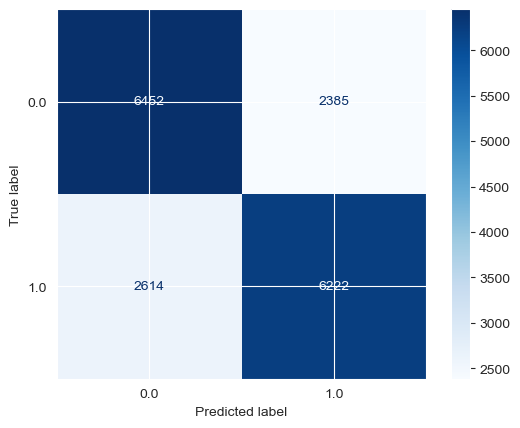

BernoulliNB
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73      8837
         1.0       0.74      0.73      0.73      8836

    accuracy                           0.73     17673
   macro avg       0.73      0.73      0.73     17673
weighted avg       0.73      0.73      0.73     17673



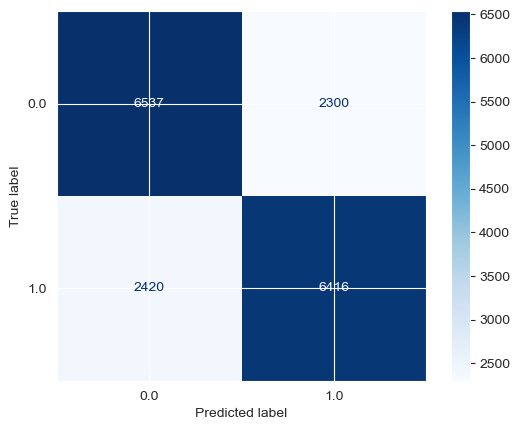

In [25]:
# Training for under sampling
for model_type in models_diabetes_under:
    print(model_type)
    model_train_test(models_diabetes_under[model_type])

In [32]:
x = np.arange(len(models_diabetes_naive['DecisionTreeClassifier'].feature_importances_))  # the label locations

width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each set of values
rects1 = ax.bar(x - width, models_diabetes_naive['DecisionTreeClassifier'].feature_importances_, width, label='DecisionTreeClassifier', color='skyblue')
rects2 = ax.bar(x, models_diabetes_naive['RandomForestClassifier'].feature_importances_, width, label='RandomForestClassifier', color='lightgreen')
rects3 = ax.bar(x + width, models_diabetes_naive['AdaBoostClassifier'].feature_importances_, width, label='AdaBoostClassifier', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Column Index')
ax.set_ylabel('Importance Val.')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

plt.show()





NameError: name 'models_diabetes_naive' is not defined

In [28]:
dt = models_diabetes_naive['DecisionTreeClassifier']
rf = models_diabetes_naive['RandomForestClassifier']
ab = models_diabetes_naive['AdaBoostClassifier']

dt_ranks = get_tree_model_feature_rank(dt)
rf_ranks = get_tree_model_feature_rank(rf)
ab_ranks = get_tree_model_feature_rank(ab)

rank = pd.DataFrame({'DecisionTree': dt_ranks,
                     'RandomForest': rf_ranks,
                     'AdaBoostClassifier': ab_ranks}).set_index(X_train.columns)
print(rank)

C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

                      DecisionTree  RandomForest  AdaBoostClassifier
HighBP                           1             1                   1
HighChol                         8             3                  10
CholCheck                       15            15                   9
BMI                              1             1                   1
Smoker                           4             5                  15
Stroke                          12            12                   6
HeartDiseaseorAttack            10            10                   5
PhysActivity                     5             8                   8
Fruits                           3             4                  14
Veggies                          7             9                  12
HvyAlcoholConsump               13            13                   4
AnyHealthcare                   14            14                  13
NoDocbcCost                     11            11                   7
GenHlth                          1

In [8]:
# Drop unnecessary columns 
df_diabetes_dropped=df_diabetes.drop(['HighChol','CholCheck', 'Smoker', 'HeartDiseaseorAttack','AnyHealthcare' , 'NoDocbcCost'],axis=1)
df_diabetes_dropped.info()

X_diabetes = df_diabetes_dropped.drop('Diabetes_012', axis=1)
Y_diabetes = df_diabetes_dropped['Diabetes_012']

# TRY smote here 
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()

X_diabetes_OverS, Y_diabetes_OverS = oversampler.fit_resample(X_diabetes, Y_diabetes)
print(Y_diabetes_OverS.value_counts())

#X_train, X_test, y_train, y_test = train_test_split(X_diabetes_OverS, Y_diabetes_OverS, test_size=0.25, random_state=100, stratify=Y_diabetes_OverS)
scaler_for_diabetes = StandardScaler()
X_train_scaled = scaler_for_diabetes.fit_transform(X_diabetes_OverS)

<class 'pandas.core.frame.DataFrame'>
Index: 249049 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_012       249049 non-null  float64
 1   HighBP             249049 non-null  float64
 2   BMI                249049 non-null  float64
 3   Stroke             249049 non-null  float64
 4   PhysActivity       249049 non-null  float64
 5   Fruits             249049 non-null  float64
 6   Veggies            249049 non-null  float64
 7   HvyAlcoholConsump  249049 non-null  float64
 8   GenHlth            249049 non-null  float64
 9   MentHlth           249049 non-null  float64
 10  PhysHlth           249049 non-null  float64
 11  DiffWalk           249049 non-null  float64
 12  Sex                249049 non-null  float64
 13  Age                249049 non-null  float64
 14  Education          249049 non-null  float64
 15  Income             249049 non-null  float64
dtypes: floa

In [10]:
# Hyper Parameter tuning with best algo and dataset
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)

grid_result = grid_search.fit(X_train_scaled, Y_diabetes_OverS)

print(f"Best score: {grid_result.best_score_}")
print(f"Best parameters: {grid_result.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best score: 0.9035577384752805
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 1}


In [11]:
# train best model and save it
# also save scaler
best_params ={
        'max_depth': 7,
    'learning_rate': 0.1,
    'subsample': 1
}
best_model_diabetes = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **best_params)

best_model_diabetes.fit(X_diabetes_OverS, Y_diabetes_OverS)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [12]:
import pickle

#save model
with open('best_model_diabetes.pkl', 'wb') as f:
    pickle.dump(best_model_diabetes, f)
#save scaler

with open('diabetes_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_for_diabetes, f)

* Heart attack dataset

In [44]:
#Load dataset
df_heart=pd.read_csv('C:\\Users\ERAY\PycharmProjects\\790project\heart_attack_prediction_dataset.csv')
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [45]:
df_heart.isnull().sum()
df_heart = df_heart.dropna()

In [46]:
df_diabetes_ha = df_heart[['Diabetes']]== 1
print(df_diabetes_ha.Diabetes.value_counts(), end='\n\n')

Diabetes
True     5716
False    3047
Name: count, dtype: int64



In [17]:
# BMI analysis
df_heart.groupby('Country')[['BMI']].mean().sort_values(by = "BMI")

,BMI
Country,
Japan,28.291157
France,28.555747
Vietnam,28.668896
Spain,28.712143
Colombia,28.714773
New Zealand,28.766462
Argentina,28.794898
Thailand,28.819812
China,28.861312


In [47]:
# change column formats and drop unnec. columns
df_heart['BP_Systolic'] = df_heart['Blood Pressure'].apply(lambda x: x.split('/')[0])
df_heart['BP_Diastolic'] = df_heart['Blood Pressure'].apply(lambda x: x.split('/')[1])
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
df_heart['Diet'] = df_heart['Diet'].map(ordinal_map)
df_heart = pd.get_dummies(df_heart, columns = ['Sex'])

#Converting 'Object' and 'Boolean' Datatype into int
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
df_heart[cat_columns] = df_heart[cat_columns].astype(int)

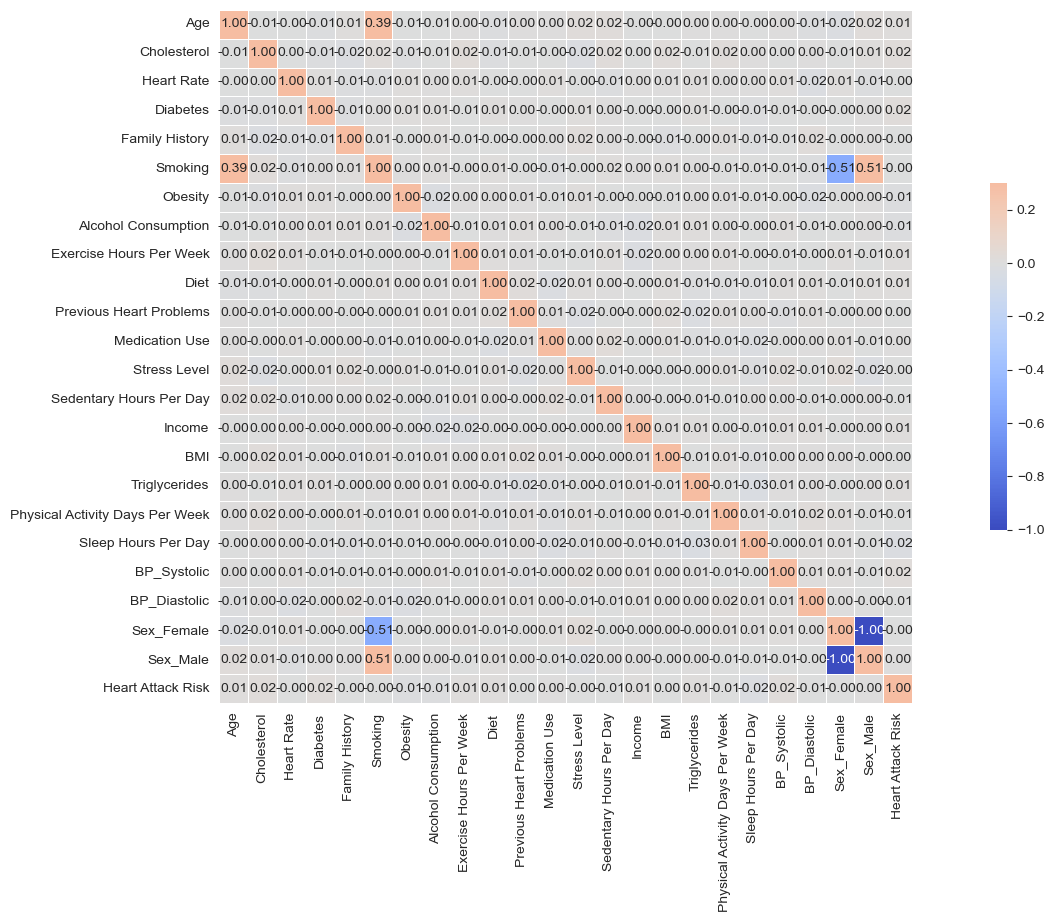

In [48]:
df_heart = df_heart[['Age', 'Cholesterol', 'Heart Rate',
        'Diabetes', 'Family History', 'Smoking', 'Obesity',
        'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level',
        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
        'Physical Activity Days Per Week', 'Sleep Hours Per Day',
         'BP_Systolic', 'BP_Diastolic','Sex_Female',
         'Sex_Male', 'Heart Attack Risk']]

g = sns.heatmap(df_heart.corr(), vmax=.3, center=0,
                square=True, linewidths=.5, 
                cbar_kws={"shrink": .5}, annot=True, 
                fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(20,9)
plt.show()

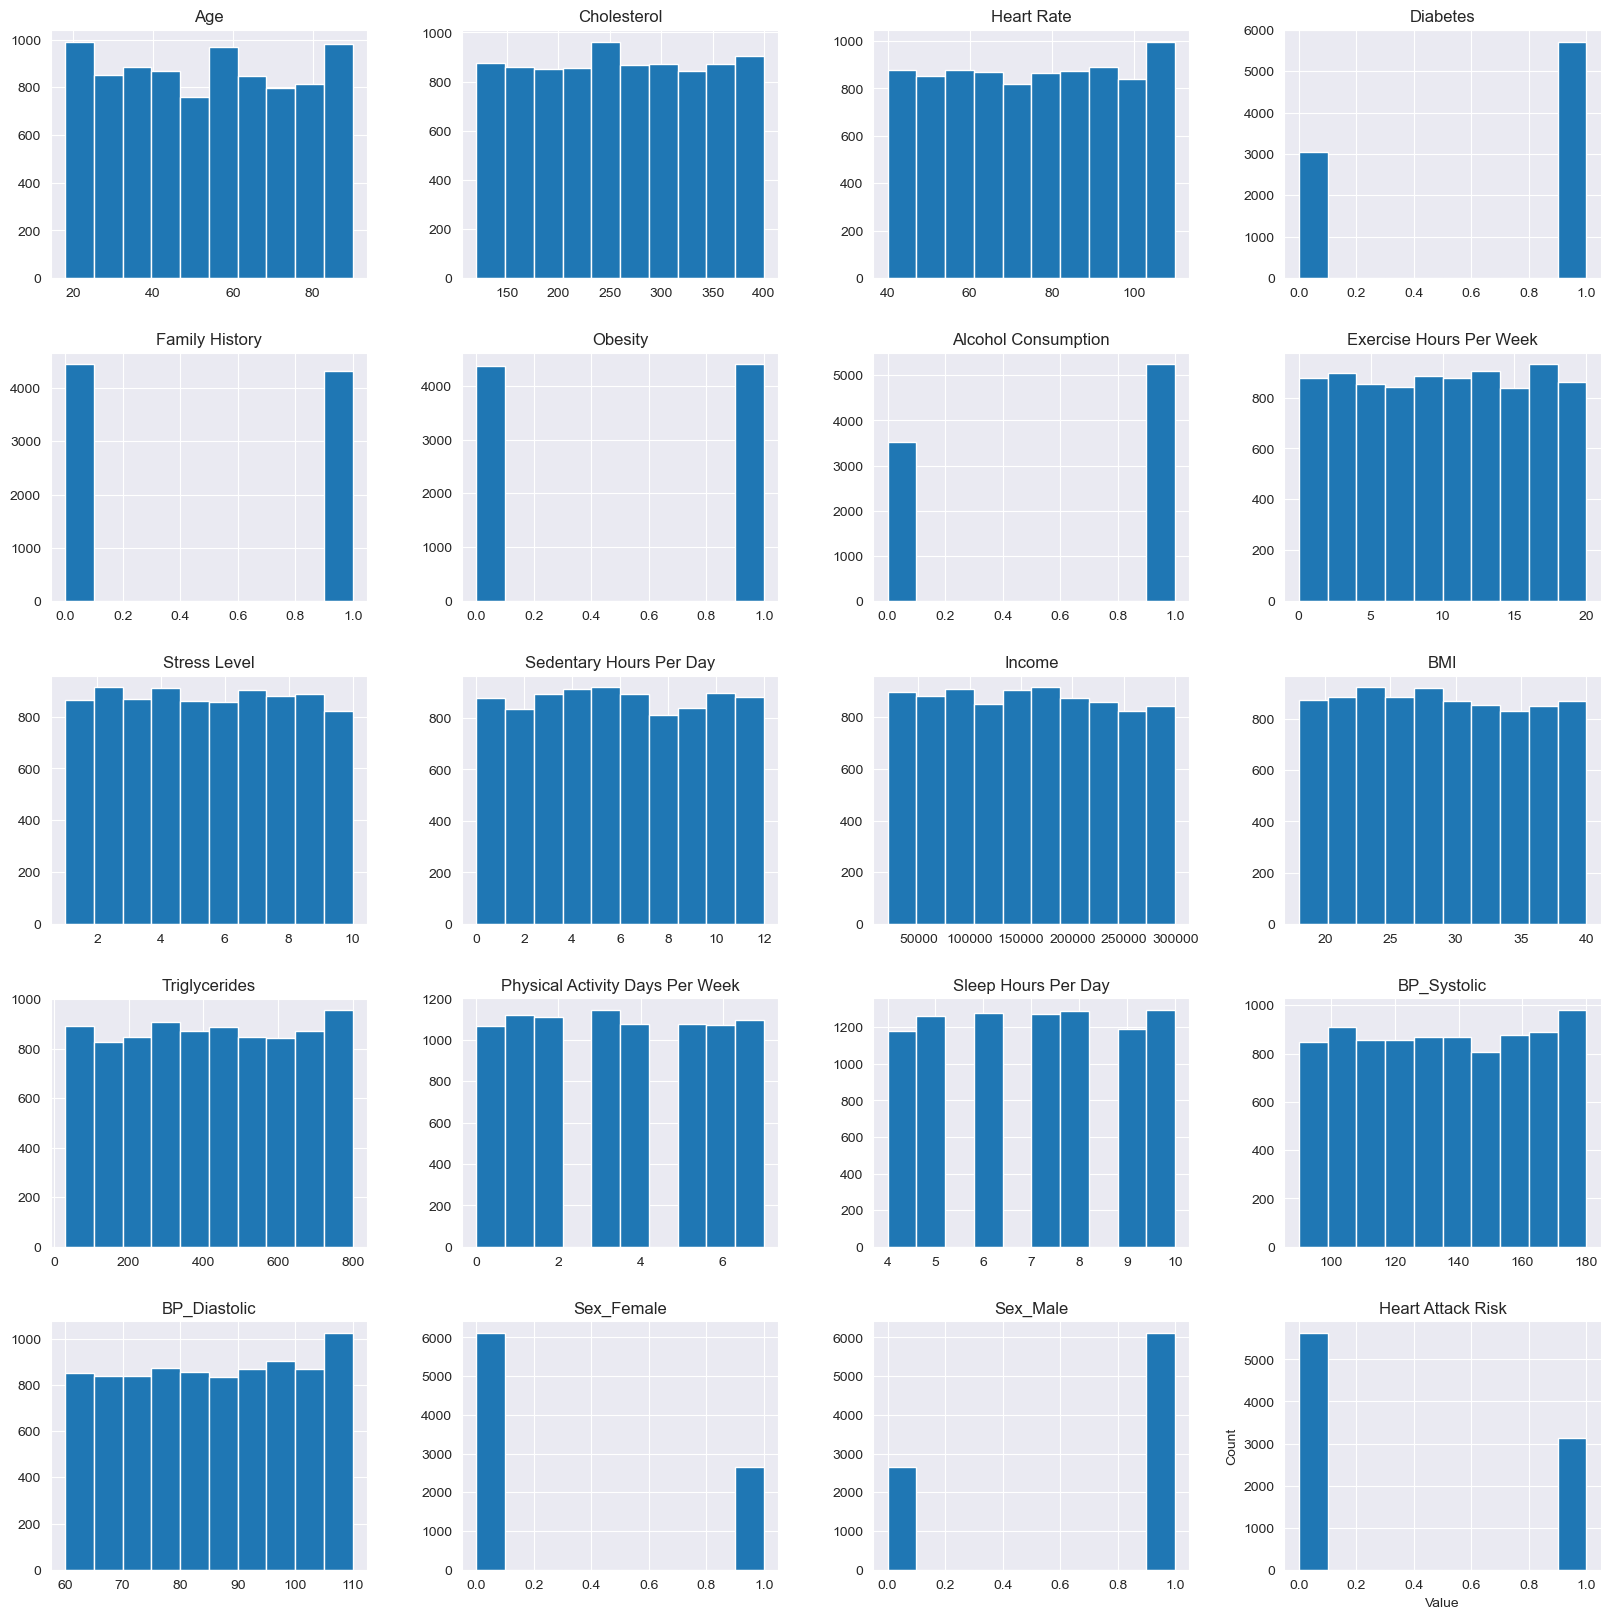

In [53]:
df_heart.hist(figsize=(20,20))
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [76]:
df_heart_ha = df_heart[['Heart Attack Risk']]== 1
print(df_heart_ha.value_counts(), end='\n\n')

Heart Attack Risk
False                5624
True                 3139
Name: count, dtype: int64



In [49]:
# not changed dataset
X_heart = df_heart.drop('Heart Attack Risk', axis=1)
Y_heart  = df_heart['Heart Attack Risk']

In [23]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()

X_heart_OverS, Y_heart_OverS = oversampler.fit_resample(X_heart, Y_heart)
print(Y_heart_OverS.value_counts())

Heart Attack Risk
0    5624
1    5624
Name: count, dtype: int64


In [25]:
# normal dataset 
X_train, X_test, y_train, y_test = train_test_split(X_heart, Y_heart, test_size=0.25, random_state=100, stratify=Y_heart)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# oversampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_heart_OverS, Y_heart_OverS, test_size=0.25, random_state=100, stratify=Y_heart_OverS)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Best Model Parameter Tunning Stroke
models_heart_naive = {'Logistic_Regression': LogisticRegression(),
                       'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
                       'RandomForestClassifier': RandomForestClassifier(),
                       'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
                       'XGBoost': xgb.XGBClassifier(),
                       'SVM': SVC(kernel='rbf'),
                       'KNN': KNeighborsClassifier(n_neighbors=10),
                       'Naive_Bayes': GaussianNB(),
                       'BernoulliNB': BernoulliNB()}

models_heart_Over = {'Logistic_Regression': LogisticRegression(),
                       'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
                       'RandomForestClassifier': RandomForestClassifier(),
                       'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
                       'XGBoost': xgb.XGBClassifier(),
                       'SVM': SVC(kernel='rbf'),
                       'KNN': KNeighborsClassifier(n_neighbors=10),
                       'Naive_Bayes': GaussianNB(),
                       'BernoulliNB': BernoulliNB()}

Logistic_Regression
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1406
           1       0.00      0.00      0.00       785

    accuracy                           0.64      2191
   macro avg       0.32      0.50      0.39      2191
weighted avg       0.41      0.64      0.50      2191



C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


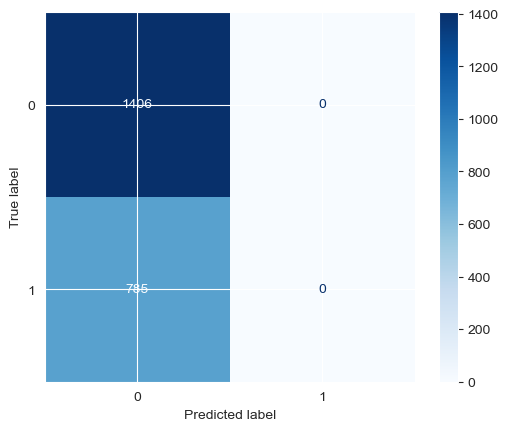

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1406
           1       0.34      0.37      0.35       785

    accuracy                           0.52      2191
   macro avg       0.49      0.49      0.49      2191
weighted avg       0.53      0.52      0.52      2191



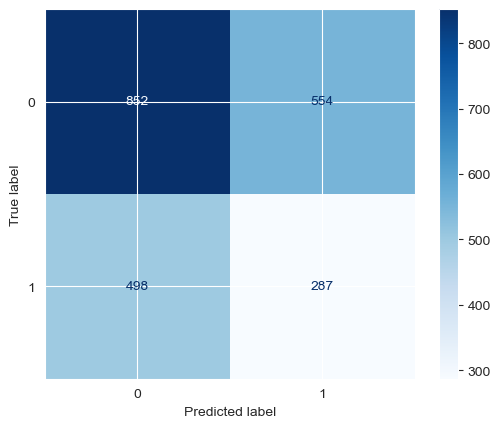

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1406
           1       0.33      0.02      0.04       785

    accuracy                           0.63      2191
   macro avg       0.49      0.50      0.41      2191
weighted avg       0.53      0.63      0.51      2191



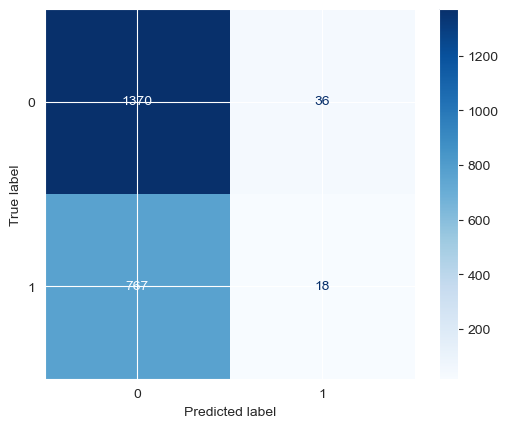

AdaBoostClassifier


C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1406
           1       0.42      0.01      0.02       785

    accuracy                           0.64      2191
   macro avg       0.53      0.50      0.40      2191
weighted avg       0.56      0.64      0.51      2191



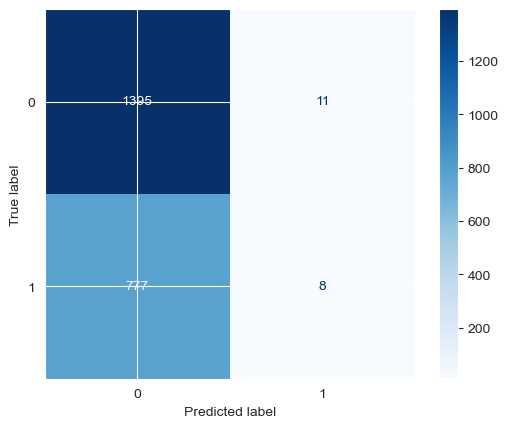

XGBoost
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1406
           1       0.38      0.21      0.27       785

    accuracy                           0.59      2191
   macro avg       0.51      0.51      0.50      2191
weighted avg       0.55      0.59      0.56      2191



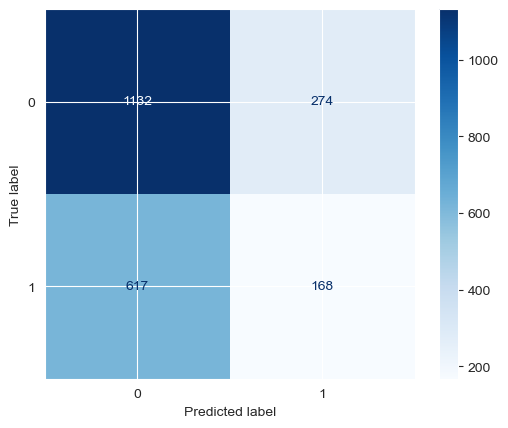

SVM
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1406
           1       0.50      0.00      0.00       785

    accuracy                           0.64      2191
   macro avg       0.57      0.50      0.39      2191
weighted avg       0.59      0.64      0.50      2191



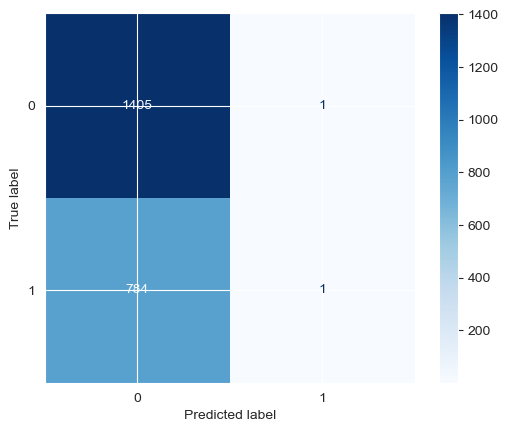

KNN
              precision    recall  f1-score   support

           0       0.64      0.89      0.74      1406
           1       0.32      0.09      0.14       785

    accuracy                           0.60      2191
   macro avg       0.48      0.49      0.44      2191
weighted avg       0.52      0.60      0.53      2191



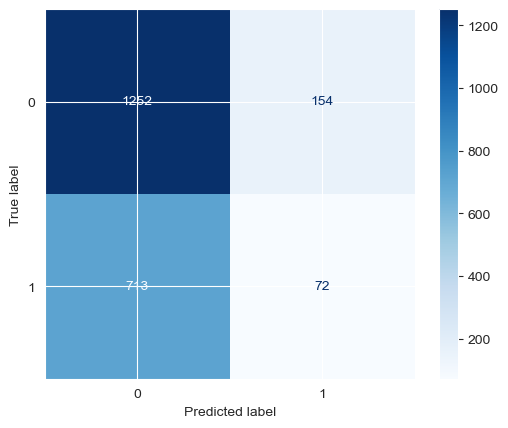

Naive_Bayes
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1406
           1       0.00      0.00      0.00       785

    accuracy                           0.64      2191
   macro avg       0.32      0.50      0.39      2191
weighted avg       0.41      0.64      0.50      2191



C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


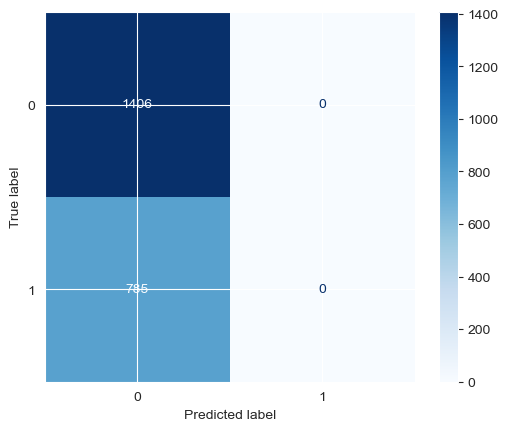

BernoulliNB
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1406
           1       0.00      0.00      0.00       785

    accuracy                           0.64      2191
   macro avg       0.32      0.50      0.39      2191
weighted avg       0.41      0.64      0.50      2191



C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


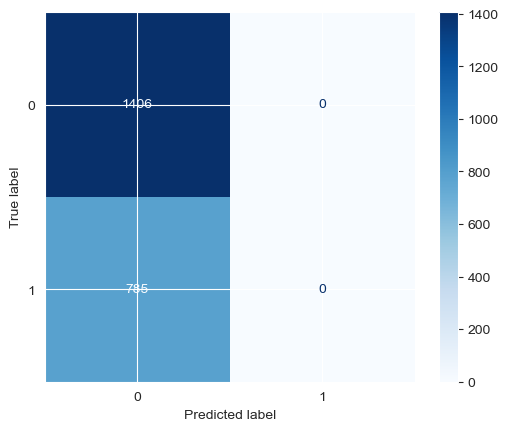

In [27]:
# Training for normal set
for model_type in models_heart_naive:
    print(model_type)
    model_train_test(models_heart_naive[model_type])

Logistic_Regression
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      1406
           1       0.69      0.53      0.60      1406

    accuracy                           0.64      2812
   macro avg       0.65      0.64      0.64      2812
weighted avg       0.65      0.64      0.64      2812



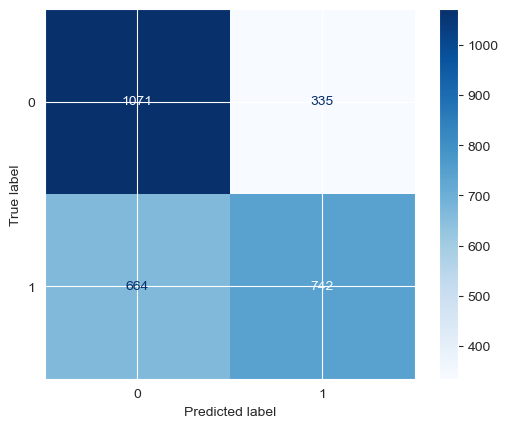

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1406
           1       0.59      0.60      0.60      1406

    accuracy                           0.59      2812
   macro avg       0.59      0.59      0.59      2812
weighted avg       0.59      0.59      0.59      2812



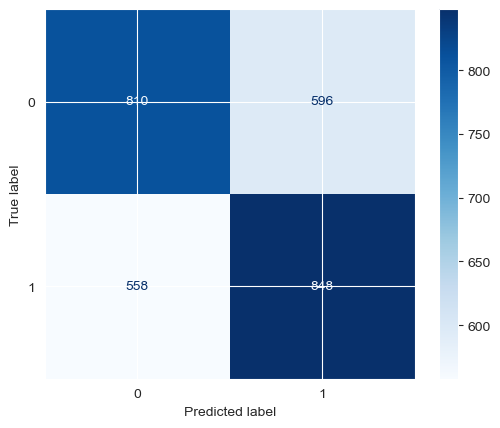

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      1406
           1       0.74      0.56      0.63      1406

    accuracy                           0.68      2812
   macro avg       0.69      0.68      0.67      2812
weighted avg       0.69      0.68      0.67      2812



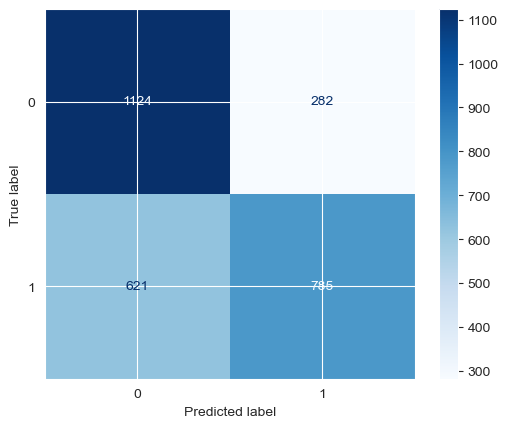

AdaBoostClassifier


C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1406
           1       0.66      0.60      0.63      1406

    accuracy                           0.64      2812
   macro avg       0.65      0.64      0.64      2812
weighted avg       0.65      0.64      0.64      2812



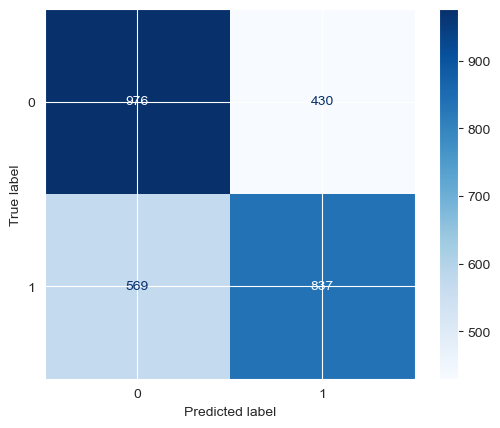

XGBoost
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1406
           1       0.67      0.63      0.65      1406

    accuracy                           0.66      2812
   macro avg       0.66      0.66      0.66      2812
weighted avg       0.66      0.66      0.66      2812



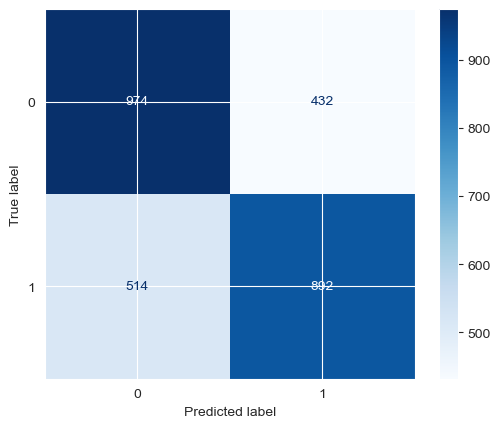

SVM
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      1406
           1       0.75      0.51      0.61      1406

    accuracy                           0.67      2812
   macro avg       0.69      0.67      0.66      2812
weighted avg       0.69      0.67      0.66      2812



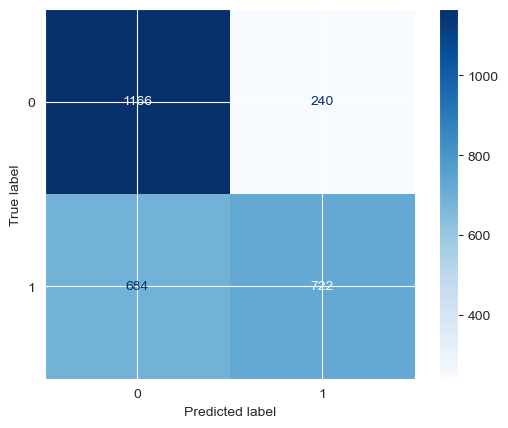

KNN
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1406
           1       0.64      0.62      0.63      1406

    accuracy                           0.64      2812
   macro avg       0.64      0.64      0.64      2812
weighted avg       0.64      0.64      0.64      2812



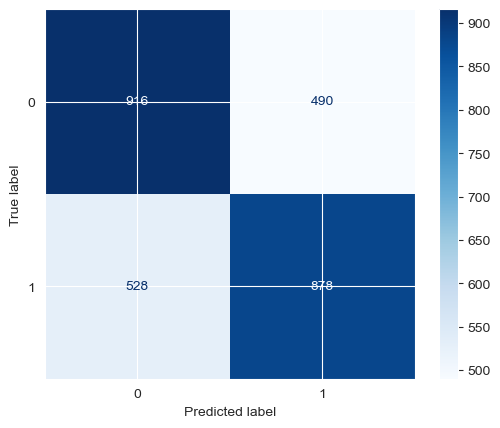

Naive_Bayes
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      1406
           1       0.65      0.60      0.62      1406

    accuracy                           0.64      2812
   macro avg       0.64      0.64      0.64      2812
weighted avg       0.64      0.64      0.64      2812



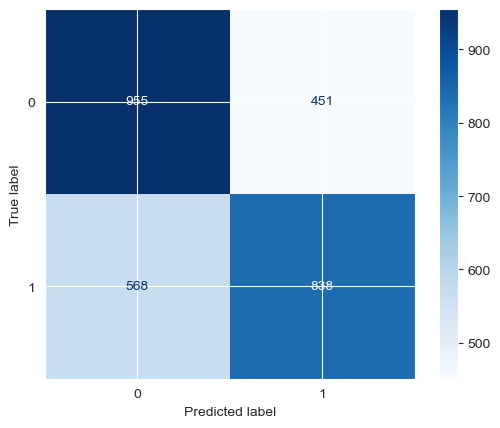

BernoulliNB
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      1406
           1       0.61      0.61      0.61      1406

    accuracy                           0.61      2812
   macro avg       0.61      0.61      0.61      2812
weighted avg       0.61      0.61      0.61      2812



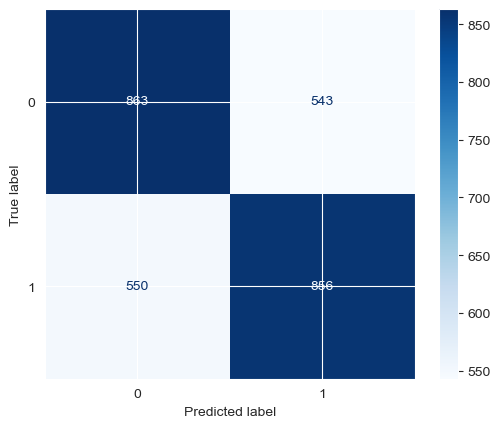

In [30]:
# Training for normal set
for model_type in models_heart_Over:
    print(model_type)
    model_train_test(models_heart_Over[model_type])

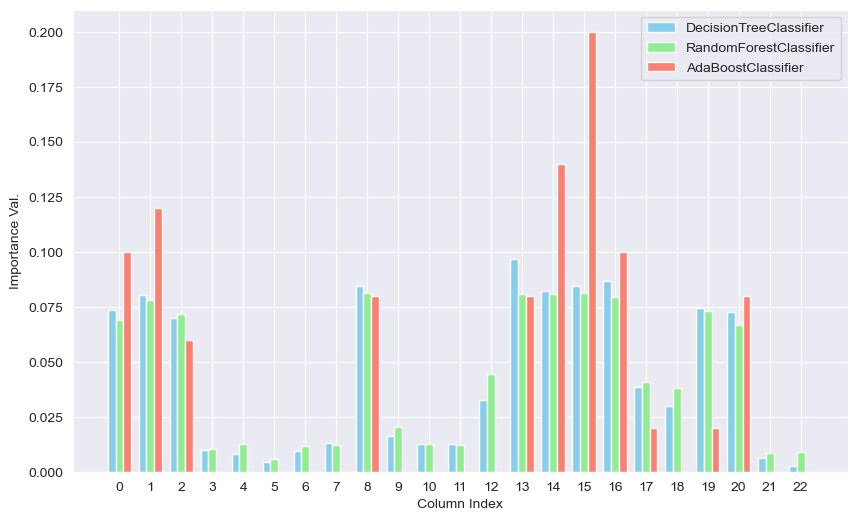

In [33]:
x = np.arange(len(models_heart_naive['DecisionTreeClassifier'].feature_importances_))  # the label locations

width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each set of values
rects1 = ax.bar(x - width, models_heart_naive['DecisionTreeClassifier'].feature_importances_, width, label='DecisionTreeClassifier', color='skyblue')
rects2 = ax.bar(x, models_heart_naive['RandomForestClassifier'].feature_importances_, width, label='RandomForestClassifier', color='lightgreen')
rects3 = ax.bar(x + width, models_heart_naive['AdaBoostClassifier'].feature_importances_, width, label='AdaBoostClassifier', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Column Index')
ax.set_ylabel('Importance Val.')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

plt.show()



In [37]:
dt = models_heart_Over['DecisionTreeClassifier']
rf = models_heart_Over['RandomForestClassifier']
ab = models_heart_Over['AdaBoostClassifier']

dt_ranks = get_tree_model_feature_rank(dt)
rf_ranks = get_tree_model_feature_rank(rf)
ab_ranks = get_tree_model_feature_rank(ab)

rank = pd.DataFrame({'DecisionTree': dt_ranks,
                     'RandomForest': rf_ranks,
                     'AdaBoostClassifier': ab_ranks}).set_index(X_train.columns)
print(rank)

C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ERAY\miniconda3\envs\llmtime\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

                                 DecisionTree  RandomForest  \
Age                                         2             1   
Cholesterol                                 1             1   
Heart Rate                                  3             3   
Diabetes                                   16            16   
Family History                             10            12   
Smoking                                    17            17   
Obesity                                    12            11   
Alcohol Consumption                        13            13   
Exercise Hours Per Week                     1             1   
Diet                                       11            10   
Previous Heart Problems                    14            14   
Medication Use                             15            15   
Stress Level                                5             5   
Sedentary Hours Per Day                     1             1   
Income                                      1          

In [50]:

# Drop unnecessary columns 
df_heart=df_heart.drop(['Smoking','Diet', 'Medication Use','Previous Heart Problems'],axis=1)
df_heart.info()

X_heart = df_heart.drop('Heart Attack Risk', axis=1)
Y_heart = df_heart['Heart Attack Risk']
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()

X_heart_OverS, Y_heart_OverS = oversampler.fit_resample(X_heart, Y_heart)
# oversampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_heart_OverS, Y_heart_OverS, test_size=0.25, random_state=100,
                                                    stratify=Y_heart_OverS)
best_scaler_heart = StandardScaler()
X_train_scaled = best_scaler_heart.fit_transform(X_heart_OverS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Obesity                          8763 non-null   int64  
 6   Alcohol Consumption              8763 non-null   int64  
 7   Exercise Hours Per Week          8763 non-null   float64
 8   Stress Level                     8763 non-null   int64  
 9   Sedentary Hours Per Day          8763 non-null   float64
 10  Income                           8763 non-null   int64  
 11  BMI                              8763 non-null   float64
 12  Triglycerides       

In [41]:

model = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)

grid_result = grid_search.fit(X_train_scaled, Y_heart_OverS)

print(f"Best score: {grid_result.best_score_}")
print(f"Best parameters: {grid_result.best_params_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best score: 0.6442938589990612
Best parameters: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 25}


In [51]:
# TODO train best model with the best parameter
best_model_heart = RandomForestClassifier(max_depth=6, max_features= 'sqrt', max_leaf_nodes= 9, n_estimators= 25)

best_model_heart.fit(X_train_scaled, Y_heart_OverS)


RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=25)

In [58]:
# TODO Save the model and scaler
import pickle

#save model
with open('best_model_heart.pkl', 'wb') as f:
    pickle.dump(best_model_heart, f)
#save scaler

with open('best_scaler_heart.pkl', 'wb') as f:
    pickle.dump(best_scaler_heart, f)